In [3]:
import pandas as pd
from pandas.core.strings import StringMethods, compat
# compat.PY3 = True
import numpy as np
# from sqlalchemy import create_engine
from datetime import datetime, timedelta
from pandas.tslib import Timedelta

# Modeling
# from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression 
# from sklearn.learning_curve import learning_curve
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score

# Classification Metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score, hamming_loss, zero_one_loss
from sklearn.metrics import brier_score_loss, jaccard_similarity_score,log_loss,matthews_corrcoef
from sklearn.metrics import precision_recall_fscore_support

# Plotting/Output
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pydot
import pyparsing
import seaborn as sns
sns.set(color_codes=True)

#NVD3
import random
from IPython import display as d
import nvd3
nvd3.ipynb.initialize_javascript(use_remote=True)

loaded nvd3 IPython extension
run nvd3.ipynb.initialize_javascript() to set up the notebook
help(nvd3.ipynb.initialize_javascript) for options


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Refactor: pd.read_csv Param
# converters : dict, default None
# Dict of functions for converting values in certain columns. Keys can either be integers or column labels
# na_values : list-like or dict, default None
# Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA values

mooc2 = pd.read_csv('HMXPC13_DI_v2_5-14-14.csv', # date_parser=pd.to_datetime(), 
                   parse_dates=['start_time_DI', 'last_event_DI'], 
                   infer_datetime_format=True)
cols = [col for col in mooc2.columns]
rows = len(mooc2)

In [128]:
explore(mooc2)

Rows: 129843

course_id <type 'str'>
['HarvardX/CB22x/2013_Spring' 'HarvardX/CS50x/2012'
 'HarvardX/ER22x/2013_Spring' 'HarvardX/PH207x/2012_Fall'
 'HarvardX/PH278x/2013_Spring' 'MITx/6.002x/2012_Fall'
 'MITx/6.002x/2013_Spring' 'MITx/14.73x/2013_Spring'
 'MITx/2.01x/2013_Spring' 'MITx/3.091x/2012_Fall' 'MITx/3.091x/2013_Spring'
 'MITx/6.00x/2012_Fall' 'MITx/6.00x/2013_Spring' 'MITx/7.00x/2013_Spring'
 'MITx/8.02x/2013_Spring' 'MITx/8.MReV/2013_Summer']

userid_DI <type 'str'>
['MHxPC130442623' 'MHxPC130275857' 'MHxPC130539455' ..., 'MHxPC130184108'
 'MHxPC130359782' 'MHxPC130098513']

registered <type 'numpy.int64'>
[1]

viewed <type 'numpy.int64'>
[0 1]

explored <type 'numpy.int64'>
[0 1]

certified <type 'numpy.int64'>
[0 1]

final_cc_cname_DI <type 'str'>
['United States' 'France' 'Unknown/Other' 'Mexico' 'Australia' 'India'
 'Canada' 'Russian Federation' 'Other South Asia'
 'Other North & Central Amer., Caribbean' 'Other Europe' 'Other Oceania'
 'Japan' 'Other Africa' 'Colombia' 

In [3]:
print 'Columns:', cols 
print 'ROWS:',rows

Columns: ['course_id', 'userid_DI', 'registered', 'viewed', 'explored', 'certified', 'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender', 'grade', 'start_time_DI', 'last_event_DI', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'roles', 'incomplete_flag']
ROWS: 641138


In [4]:
def explore(df):
    column_list = df.columns.values.tolist()
    print 'Rows:', len(mooc)
    print
    for column_name in column_list:
        print column_name, type(df[column_name].iloc[0])
        print df[column_name].unique()
        print

In [5]:
%time 
# Remove 'roles' column since all values are NAN
# General: Columns Removed: 'userid_DI', 'registered', 'roles', 'incomplete_flag', 
#        'start_time_DI','last_event_DI',

cols2 = ['grade','userid_DI','course_id','certified','viewed','explored','ndays_act',
         'nplay_video','nchapters','nevents','nforum_posts','final_cc_cname_DI',
         'LoE_DI','YoB','gender','start_time_DI', 'last_event_DI']
mooc = mooc[cols2]
# ***** Rsearch School *****
# "Julia": Feature Selection: 'Feature Importance', Gini Importance for DT

# Generate Feature: letter-grade. e.g B- ...
# How are they Graded, andd Certified based on each class??
mooc['grade'] = mooc.grade.fillna(' ')
mooc = mooc[mooc.grade != ' ']
mooc['grade'] = mooc['grade'].astype(float) #mooc.apply(lambda row: grade2float(row),axis=1)
#mooc = mooc[mooc.grade != 0]

mooc['LoE_DI'] = mooc.LoE_DI.fillna(0)
mooc = mooc[mooc.LoE_DI != 0]
mooc['LoE_DI'] = mooc['LoE_DI'].map({'Less than Secondary':0,'Secondary':1,"Bachelor's":2,"Master's":3,'Doctorate':4})

mooc['YoB'] = mooc.YoB.fillna(0)
mooc = mooc[mooc.YoB != 0]

mooc['start_time_DI'] = mooc.start_time_DI.fillna(0)
mooc = mooc[mooc.start_time_DI != 0]
mooc['start_time_DI'] = pd.DatetimeIndex(mooc['start_time_DI']).date

mooc['last_event_DI'] = mooc.last_event_DI.fillna(0)
mooc = mooc[mooc.last_event_DI != 0]
mooc['last_event_DI'] = pd.DatetimeIndex(mooc['last_event_DI']).date

# Relace ' '??????
mooc['nevents'] = mooc.nevents.fillna(0)
mooc = mooc[mooc.nevents != 0]

mooc['ndays_act'] = mooc.ndays_act.fillna(0)
mooc = mooc[mooc.ndays_act != 0]

mooc['nplay_video'] = mooc.nplay_video.fillna(0)
mooc = mooc[mooc.nplay_video != 0]

mooc['nchapters'] = mooc.nchapters.fillna(0)
mooc = mooc[mooc.nchapters != 0]

mooc['gender'] = mooc.gender.fillna(0)
mooc = mooc[mooc.gender != 0]

CPU times: user 12 µs, sys: 3 µs, total: 15 µs
Wall time: 32.9 µs


In [6]:
# Generate Feature: grade_range = A,B,C,D,F
def letter_grade(row):
    grd = row.grade
    letter = ''
    if (0.90 <= grd <= 1): letter = 'A'
    elif (0.80 <= grd < 0.90): letter = 'B'
    elif (0.70 <= grd < 0.80): letter = 'C'
    elif (0.60 <= grd < 0.70): letter = 'D'
    else: letter = 'F'
    return letter

def age_range(row):
    rng = ''
    if (13 <= row.age < 18): rng = 'teenagers < 18'
    elif (18 <= row.age < 30): rng = '18-29'
    elif (30 <= row.age < 40): rng = '30s'
    elif (40 <= row.age < 50): rng = '40s'
    elif (50 <= row.age < 60): rng = '50s'
    elif (60 <= row.age < 70): rng = '60s'
    elif (70 <= row.age): rng = '70+'
    else: rng = ' '
    return rng

def get_course_value(row, df):
    for crs_code in df.index:
        if row.course_code == crs_code:
            return int(df.loc[crs_code].item())

def registration_duration_2_days(row):
    return int(str(Timedelta(value=row.registration_duration,unit='D')).split()[0])

* Tie columns
* Am i recomputing anything i shouldn't?

In [7]:
mooc.columns

Index([u'grade', u'userid_DI', u'course_id', u'certified', u'viewed',
       u'explored', u'ndays_act', u'nplay_video', u'nchapters', u'nevents',
       u'nforum_posts', u'final_cc_cname_DI', u'LoE_DI', u'YoB', u'gender',
       u'start_time_DI', u'last_event_DI'],
      dtype='object')

In [9]:
# New Features
%time
mooc['letter_grade'] = mooc.apply(lambda row: letter_grade(row),axis=1)
mooc['outcome'] = (mooc['certified'].replace(1, 'Certified:').replace(0, 'Not Certified:') 
                   + ' ' + mooc['letter_grade']).map({'Not Certified: F':0,'Not Certified: D':1,
                                                      'Not Certified: C':2,'Certified: F':3,'Certified: D':4,
                                                      'Certified: C':5,'Certified: B':6,'Certified: A':7})

# ['Not Certified: F' 'Certified: A' 'Certified: B' 'Not Certified: C'
#  'Not Certified: D' 'Certified: C' 'Certified: D' 'Certified: F']

# days inactive
# mooc['registration_duration'] = (mooc['last_event_DI'] - mooc['start_time_DI'])
# mooc = mooc[mooc['registration_duration'].astype(int) >= 0]
# mooc['registration_duration'] = mooc.apply(lambda row: register_duration_2_days(row),axis=1)

mooc['institution'] = mooc['course_id'].str.split("/",return_type='frame',)[0]
mooc['course_code'] = mooc['course_id'].str.split("/",return_type='frame',)[1]
mooc['semester'] = mooc['course_id'].str.split("/",return_type='frame',)[2]

# start year needs to be generated from 'semester', not dates!!!!
mooc['start_year'] = mooc['semester'].str.split("_",return_type='frame',)[0].astype('int') #pd.DatetimeIndex(pd.to_datetime(mooc['start_time_DI'])).year
mooc['age'] = mooc['start_year'] - mooc['YoB']
# eliminate youngers!!!
mooc['age_range'] = mooc.apply(lambda row: age_range(row),axis=1)
mooc = mooc[mooc.age_range != ' ']

# Generates chapter events
# mooc['nchapter_events'] = (mooc['nchapters'] * mooc['nevents'].divide(mooc['nchapters'])).fillna(0)

# Completion/Comparison Metrics
# Completion/Comparison
max_chaps_completed = mooc[['course_code', 'nchapters']].groupby(['course_code']).max()
mooc['max_nchapters'] = mooc.apply(lambda row: get_course_value(row, max_chaps_completed),axis=1)
mooc['%max_chapters_viewed'] = mooc['nchapters'].divide(mooc['max_nchapters']) #(td / np.timedelta64(1, 'D')).astype(int)
# Completion/Comparison
max_video_views = mooc[['course_code', 'nplay_video']].groupby(['course_code']).max()
mooc['max_nplay_video'] = mooc.apply(lambda row: get_course_value(row, max_video_views),axis=1)
mooc['%max_videos_viewed'] = mooc['nplay_video'].divide(mooc['max_nplay_video'])
# Comparison
max_posts = mooc[['course_code', 'nforum_posts']].groupby(['course_code']).max()
mooc['max_nforum_posts'] = mooc.apply(lambda row: get_course_value(row, max_posts),axis=1)
mooc['%max_posts_viewed'] = mooc['nforum_posts'].divide(mooc['max_nforum_posts'])
# Comparison
max_events = mooc[['course_code', 'nevents']].groupby(['course_code']).max()
mooc['max_nevents'] = mooc.apply(lambda row: get_course_value(row, max_events),axis=1)
mooc['%max_events'] = mooc['nevents'].divide(mooc['max_nevents'])
# Comparison
max_days_act = mooc[['course_code', 'ndays_act']].groupby(['course_code']).max()
mooc['max_ndays_act'] = mooc.apply(lambda row: get_course_value(row, max_days_act),axis=1)
mooc['%max_days_act'] = mooc['ndays_act'].divide(mooc['max_ndays_act'])

# 'ndays_act', 'nplay_video', 'nchapters', 'nevents', 'nforum_posts',

# Interaction Ratios: <= 1% Interactions/events
# (u'ndays_act', u'nplay_video', u'nchapters', u'nforum_posts') / u'nevents' 
mooc['nplay_video/nevents'] = (mooc['nplay_video'].divide(mooc['nevents'])).fillna(0)
mooc['nchapters/nevents'] = (mooc['nchapters'].divide(mooc['nevents'])).fillna(0)
mooc['nforum_posts/nevents'] = (mooc['nforum_posts'].divide(mooc['nevents'])).fillna(0)

# u'ndays_act', u'nplay_video', u'nchapters', u'nevents', u'nforum_posts'
# Events Per Day: <= 1 day
# Visualization: that thing
mooc['nevents_per_day'] = (mooc['nevents'].divide(mooc['max_ndays_act'])).fillna(0)
mooc['nplay_video_per_day'] = (mooc['nplay_video'].divide(mooc['max_ndays_act'])).fillna(0)
mooc['nchapters_per_day'] = (mooc['nchapters'].divide(mooc['max_ndays_act'])).fillna(0)
mooc['nforum_posts_per_day'] = (mooc['nforum_posts'].divide(mooc['max_ndays_act'])).fillna(0)

# Days spent on specific events
# mooc['ndays_events'] = (mooc['nevents'] * mooc['ndays_act'].divide(mooc['nevents'])).fillna(0)
mooc['ndays_play_video'] = (mooc['nplay_video'] * mooc['ndays_act'].divide(mooc['nplay_video'])).fillna(0)
mooc['ndays_chapters'] = (mooc['nchapters'] * mooc['ndays_act'].divide(mooc['nchapters'])).fillna(0)
mooc['ndays_forum_posts'] = (mooc['nforum_posts'] * mooc['ndays_act'].divide(mooc['nforum_posts'])).fillna(0)

#get chap events!!!

# mooc['result'] = mooc.apply(lambda row: result(row),axis=1)

CPU times: user 345 µs, sys: 39 µs, total: 384 µs
Wall time: 83 µs


/home/jejodesty/anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:81: FutureWarning: the return_type='frame' keyword is deprecated, use expand=True instead
  warnings.warn(msg, FutureWarning)


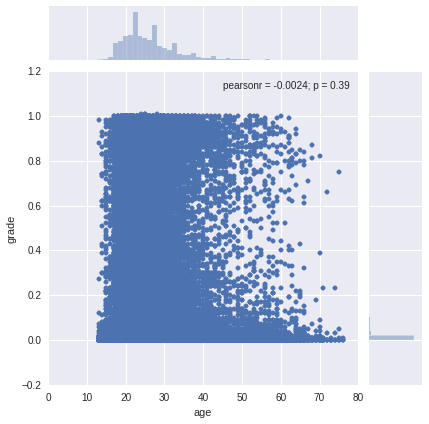

In [42]:
sns.jointplot(x="age", y="grade", data=mooc) #Heatmap

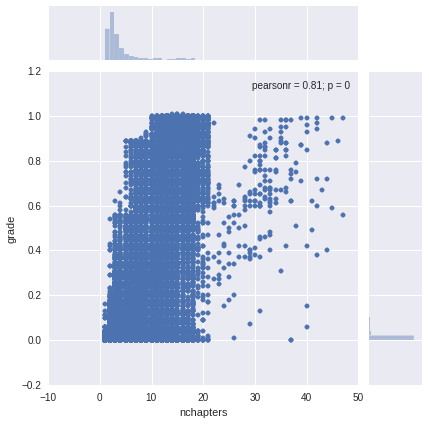

In [382]:
sns.jointplot(x='nchapters',y='grade',data=mooc)

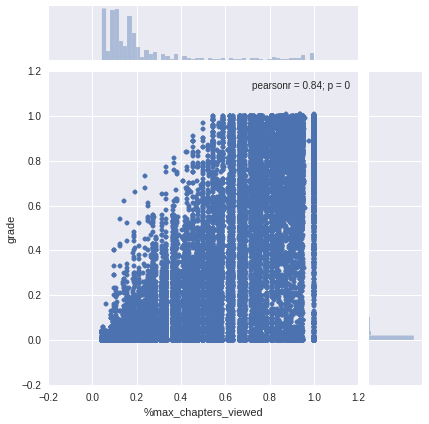

In [383]:
sns.jointplot(x='%max_chapters_viewed',y='grade',data=mooc)

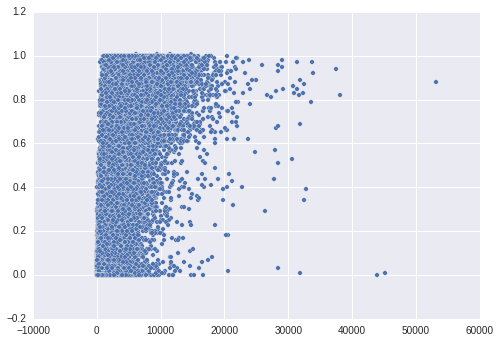

In [530]:
#c = np.array([0,1,2,3,4,5,6,7])
plt.scatter(mooc['nevents'],mooc['grade'])
# sns.kdeplot(mooc['nevents'], mooc['grade'], shade=True)

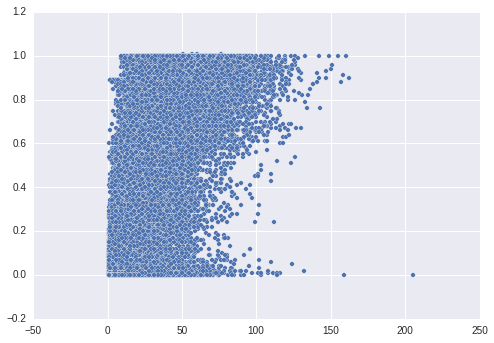

In [531]:
plt.scatter(mooc['ndays_act'],mooc['grade'])

#### Exploration

###Open Issues List
* 1. Gets Interesting stats then Viz
* chk. ??????Don't binarize course, map values, because students can take multiple courses
* 1. Interpret remaining  metrics
* 1. Model Course: COURSE DATA IN TRAIN, NOOOOO!!!!
* 1. Binning: Determine demographics of students scoring certain letter grades
* 3. multilabel !?!?!?!
* 2. Provide scenario: edX, institution, course characterstics
* Transformation: start year needs to be generaated from 'semester', not dates!!!!
* 2. Modeling: Cross-Val-Predict??
* 2. Modeling: Relate over & under fitting
* 3. Classification: Use other types of Ys
* 2. Fit Models with top features and interpret

#### Interpretations
nevents v age
age: Most students are in their 20s
age Cor: 'ndays_events','ndays_play_video','ndays_chapters' have the same graphs
number of days spent on all interactions increase with the %max_chapters_veiwed, 
number of forum posts decreases when the %max_chapters_veiwed increases
(%max_chapters_veiwed increases >= 0.6), it is only then possible to get aperfect grade [Rewrite]

inconsitent 'ndays_events' !!!!! Check EDU Docs!!!
Certified: F & D ???
FILTER INCONSISTENCIES!!!!!!!!
Age Range v Everythang!!!!

In [138]:
outcome_cols = ['outcome','certified','letter_grade','grade',#'nchapter_events',
                'nevents','nchapters','nplay_video','nforum_posts','age',# Graph: Bar
                'ndays_act','ndays_chapters','ndays_play_video','ndays_forum_posts',# Graph:
                'nchapters/nevents', # Graph ,1 , ‘barstacked’ hist
                'nplay_video/nevents',
                'nforum_posts/nevents',
                'nevents_per_day',# Graph,1, ‘barstacked’ hist
                'nchapters_per_day',
                'nplay_video_per_day',
                'nforum_posts_per_day',
                '%max_chapters_viewed', # From Amt: Graph 
                'age_range','LoE_DI','final_cc_cname_DI','gender',# Graph: Count
                'institution','course_code','semester']

# grade_cols = ['grade', outcome_cols[1:]]
# 6.00x 51503
# & (mooc['semester']=='Spring_2013')
MITx_600x = (mooc[outcome_cols][(mooc['course_code']=='6.00x')]).dropna(subset=outcome_cols)
MITx_600x['Outcome'] = MITx_600x['outcome'].map({0:'Not Certified: F',1:'Not Certified: D',
                                                      2:'Not Certified: C',3:'Certified: F',4:'Certified: D',
                                                      5:'Certified: C',6:'Certified: B',7:'Certified: A'})
MITx_600x_active = MITx_600x[MITx_600x['outcome']!=0]
num_MITx_600x = MITx_600x[outcome_cols[:17]]

In [126]:
print len(MITx_600x_active)
print len(MITx_600x)
explore(mooc)

2539
51437
Rows: 129843

grade <type 'numpy.float64'>
[ 0.    0.01  0.29  0.18  0.1   0.11  0.02  0.13  0.92  0.09  0.89  0.99
  0.04  0.93  0.15  0.38  0.43  0.05  0.22  0.45  0.07  0.83  0.77  0.96
  0.03  0.33  0.06  0.6   0.87  0.94  0.2   1.    0.84  0.91  0.34  0.08
  0.23  0.39  0.98  0.75  0.85  0.8   0.95  0.97  0.88  0.26  0.12  0.35
  0.31  0.36  0.16  0.37  0.66  0.9   0.42  0.72  0.4   0.14  0.25  0.51
  0.28  0.56  0.24  0.86  0.57  0.53  0.21  0.49  0.67  0.17  0.69  0.55
  0.32  0.76  0.64  0.3   0.73  0.48  0.79  0.81  0.5   0.7   0.46  0.19
  0.52  0.78  0.63  0.68  0.27  0.58  0.62  0.47  0.54  0.44  0.74  0.61
  0.65  0.41  0.82  0.59  0.71  1.01]

userid_DI <type 'str'>
['MHxPC130237753' 'MHxPC130519020' 'MHxPC130123976' ..., 'MHxPC130436096'
 'MHxPC130119974' 'MHxPC130390619']

course_id <type 'str'>
['HarvardX/PH207x/2012_Fall' 'HarvardX/PH278x/2013_Spring'
 'MITx/14.73x/2013_Spring' 'MITx/8.02x/2013_Spring' 'MITx/6.00x/2012_Fall'
 'MITx/6.00x/2013_Spring' 'MITx/

In [500]:
# Diffences in people grade

In [139]:
rows = []
for i in pd.Series(MITx_600x_active['outcome'].values).unique():
    row = []
    for col in MITx_600x_active.columns[3:19]:
        row.append(MITx_600x_active[outcome_cols[3:19]][col][MITx_600x_active['outcome']==i].mean())
    rows.append(row)
mean_MITx_600x = pd.DataFrame(rows, columns=MITx_600x.columns[3:19])
mean_MITx_600x['outcome'] = pd.Series(MITx_600x_active['outcome'].values).unique()

In [140]:
mean_MITx_600x

grade      nevents  nchapters  nplay_video  nforum_posts        age  \
0  0.571044  6041.175824  15.565934   463.972527      0.269231  25.648352   
1  0.935222  8200.269841  17.284127   691.092063      0.144444  25.984127   
2  0.846204  8417.778589  17.100973   627.791971      0.178832  27.097324   
3  0.744059  7549.177824  16.598326   505.190377      0.213389  25.974895   
4  0.650843  7358.142857  16.175644   536.896956      0.201405  25.826698   

   ndays_act  ndays_chapters  ndays_play_video  ndays_forum_posts  \
0  53.280220       53.280220         53.280220           7.862637   
1  72.639683       72.639683         72.639683           6.130159   
2  70.019465       70.019465         70.019465           7.332117   
3  61.736402       61.736402         61.736402           9.163180   
4  59.370023       59.370023         59.370023           7.103044   

   nchapters/nevents  nplay_video/nevents  nforum_posts/nevents  \
0           0.003267             0.070416              0.000051   
1           0.002424             0.079055              0.000020   
2           0.002459             0.071574              0.000025   
3           0.002777             0.062100              0.000029   
4           0.002768             0.065201              0.000033   

   nevents_per_day  nchapters_per_day  nplay_video_per_day  outcome  
0        29.469150           0.075931             2.263281        3  
1        40.001316           0.084313             3.371181        7  
2        41.062335           0.083419             3.062400        6  
3        36.825258           0.080967             2.464343        5  
4        35.893380           0.078906             2.619010        4

In [299]:
a = mean_MITx_600x['outcome'].unique()
a.sort()
a
b = np.array([0,1,2,3,4])

In [700]:
type = 'stackedAreaChart'
MITx_600x_chart = nvd3.stackedAreaChart(name=type,height=450,width=500, 
                               use_interactive_guideline=True)

ydata = range(300)
xdata1 = MITx_600x_active['nevents_per_day'].values
xdata2 = MITx_600x_active['nchapters_per_day'].values
xdata3 = MITx_600x_active['nplay_video_per_day'].values
xdata4 = MITx_600x_active['nforum_posts_per_day'].values

MITx_600x_chart.add_serie(name="Events per Day", y=ydata, x=xdata1)
MITx_600x_chart.add_serie(name="Chapters per Day", y=ydata, x=xdata2)
MITx_600x_chart.add_serie(name="Video Plays per_Day", y=ydata, x=xdata3)
MITx_600x_chart.add_serie(name="Forum Posts per Day", y=ydata, x=xdata4)
MITx_600x_chart

In [371]:
# type = 'stackedAreaChart'
# chart2 = nvd3.stackedAreaChart(name=type,height=450,width=500, 
#                                use_interactive_guideline=True)
# nb_element = 50
# xdata = range(nb_element)
# ydata = [i * random.randint(1, 10) for i in range(nb_element)]
# ydata2 = [x * 2 for x in ydata]
# ydata3 = [x * 5 for x in ydata]
# chart2.add_serie(name="serie 1", y=ydata, x=xdata)
# chart2.add_serie(name="serie 2", y=ydata2, x=xdata)
# chart2.add_serie(name="serie 3", y=ydata3, x=xdata)
# chart2

In [372]:
#Not at 0
#line????
# ticks = np.arange(-500, 6000)
# labels = range(ticks.size)

Common Obj: Most Students register to access the courseware
Because they're not simmilar


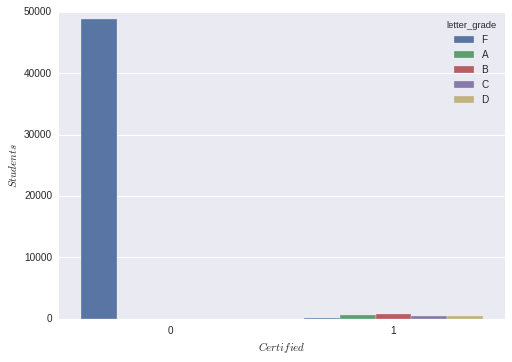

In [653]:
ax = sns.countplot(x="certified", hue="letter_grade", data=MITx_600x)
ax.set(ylabel='$Students$')
ax.set(xlabel='$Certified$')
#set_axis_labels("$Certified$", "$Students$")
print 'Common Obj: Most Students register to access the courseware'
print "Because they're not simmilar"

Common Obj: Most students recieve a B


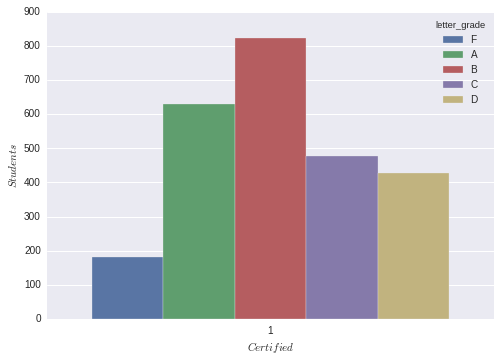

In [654]:
ax = sns.countplot(x="certified", hue="letter_grade", data=MITx_600x_active)
ax.set(ylabel='$Students$')
ax.set(xlabel='$Certified$')
print 'Common Obj: Most students recieve a B'

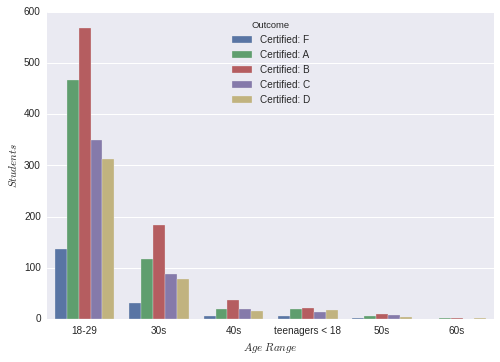

In [657]:
ax = sns.countplot(x="age_range", hue="Outcome", data=MITx_600x_active)
ax.set(ylabel='$Students$')
ax.set(xlabel='$Age$ $Range$')

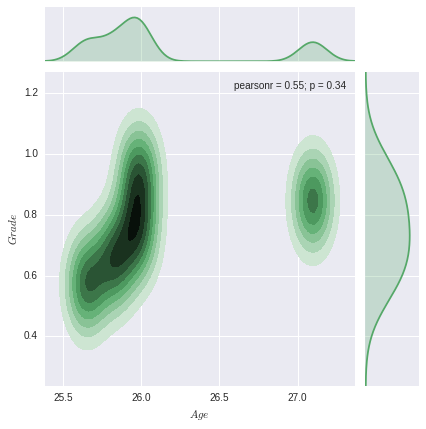

In [658]:
# sns.kdeplot(mean_MITx_600x['age'], mean_MITx_600x['grade'], shade=True)
ax = sns.jointplot(x='age',y='grade', data=mean_MITx_600x, kind='kde', color="g")
ax.ax_joint.collections[0].set_alpha(0)
ax.set_axis_labels("$Age$", "$Grade$")

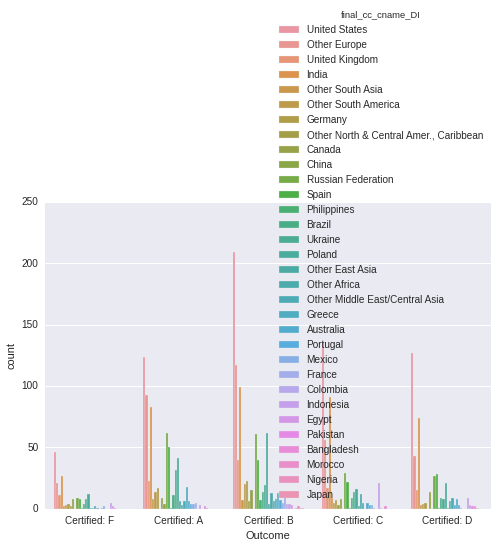

In [534]:
#ax = sns.countplot(x='Outcome', hue='final_cc_cname_DI', data=MITx_600x_active)

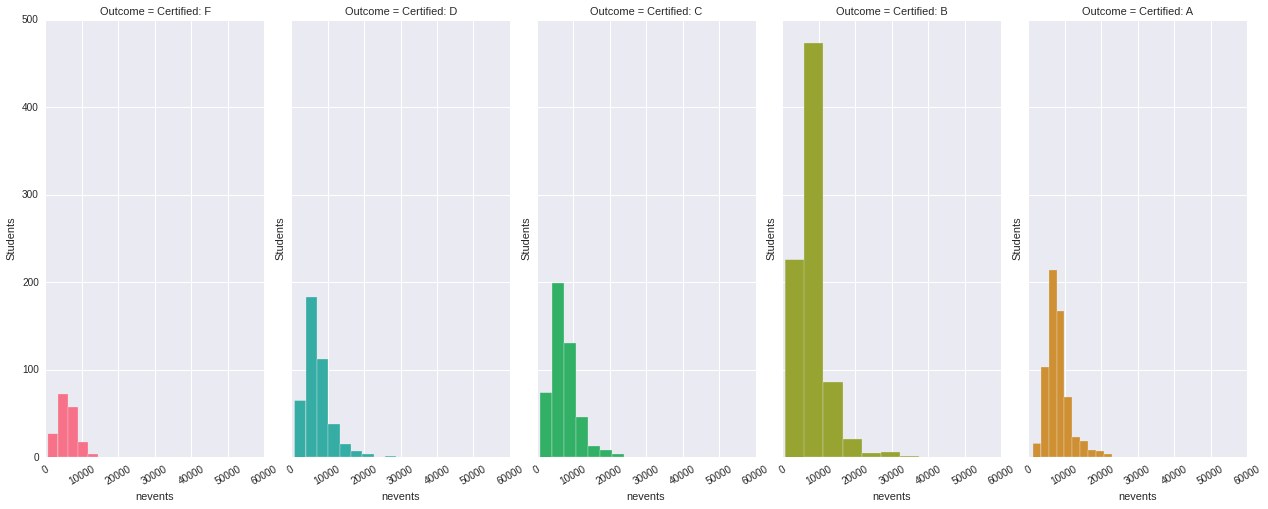

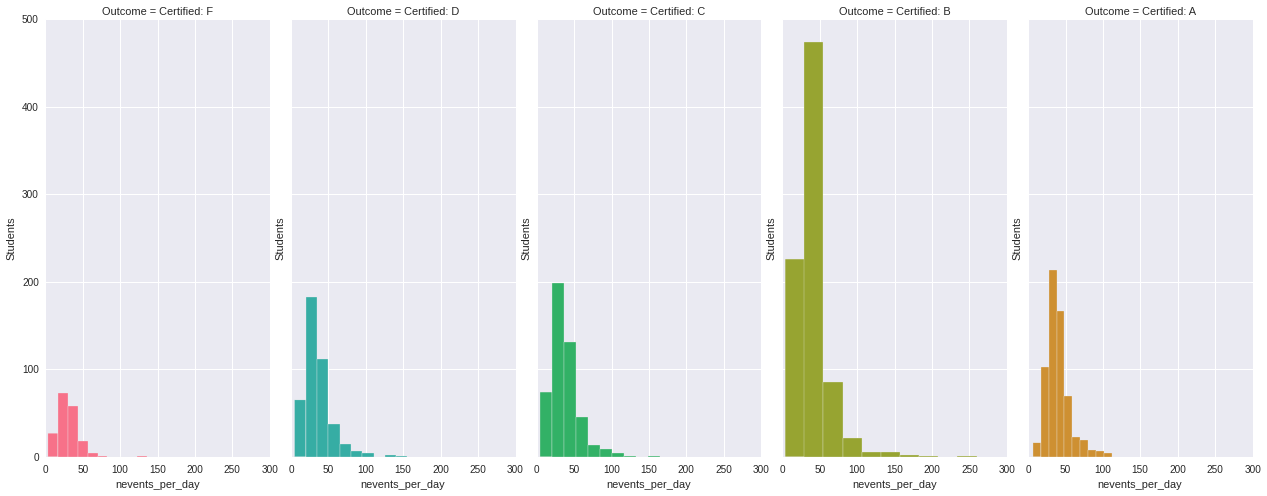

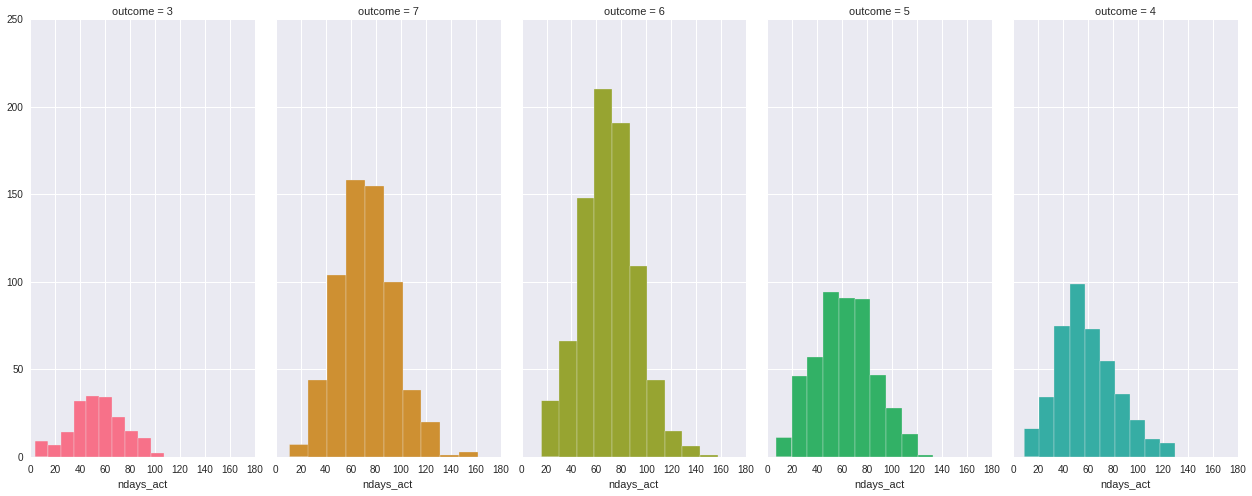

In [701]:
nevents = sns.FacetGrid(MITx_600x_active, col='Outcome', 
                        col_order=["Certified: F", "Certified: D","Certified: C","Certified: B", "Certified: A"], 
                        hue='Outcome', size=7, aspect=.5,palette=sns.color_palette("husl", 8))
nevents = nevents.map(plt.hist, "nevents").set(ylabel='Students').set_xticklabels(rotation=30)
neventsPD = sns.FacetGrid(MITx_600x_active, col='Outcome', 
                          col_order=["Certified: F", "Certified: D", "Certified: C","Certified: B", "Certified: A"], 
                          hue='Outcome', size=7, aspect=.5,palette=sns.color_palette("husl", 8))
neventsPD = neventsPD.map(plt.hist, "nevents_per_day").set(ylabel='Students')
ndays_act = sns.FacetGrid(MITx_600x_active, col="outcome", hue="outcome", size=7, aspect=.5, 
                        palette=sns.color_palette("husl", 8))
ndays_act = ndays_act.map(plt.hist, 'ndays_act')

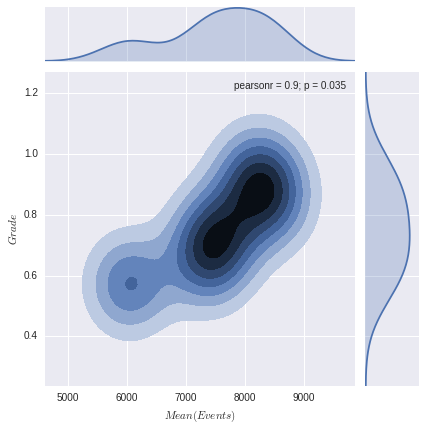

In [141]:
ax = sns.jointplot(x='nevents',y='grade', data=mean_MITx_600x, kind='kde', color="b")
ax.ax_joint.collections[0].set_alpha(0)
ax.set_axis_labels("$Mean(Events)$", "$Grade$")

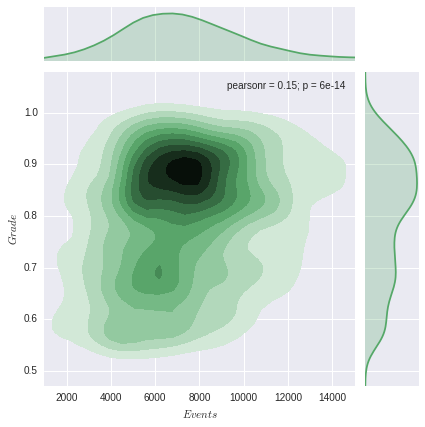

In [56]:
ax = sns.jointplot(x='nevents',y='grade', data=MITx_600x_active, kind='kde', color="g", xlim=(1000,15000))
ax.ax_joint.collections[0].set_alpha(0)
ax.set_axis_labels("$Events$", "$Grade$")

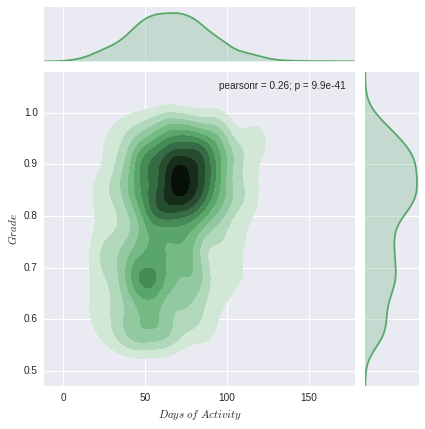

In [661]:
ax = sns.jointplot(x='ndays_act',y='grade', data=MITx_600x_active, kind='kde', color="g")
ax.ax_joint.collections[0].set_alpha(0)
ax.set_axis_labels("$Days$ $of$ $Activity$", "$Grade$")

In [636]:
nchapters = sns.FacetGrid(MITx_600x_active, col='Outcome', 
                          col_order=["Certified: F", "Certified: D","Certified: C","Certified: B", "Certified: A"], 
                          hue='Outcome', size=7, aspect=.5,palette=sns.color_palette("husl", 8))
nchapters = nchapters.map(plt.hist, 'nchapters').set(ylabel='Students').set_xticklabels(rotation=30)

KeyError: 'Outcome'

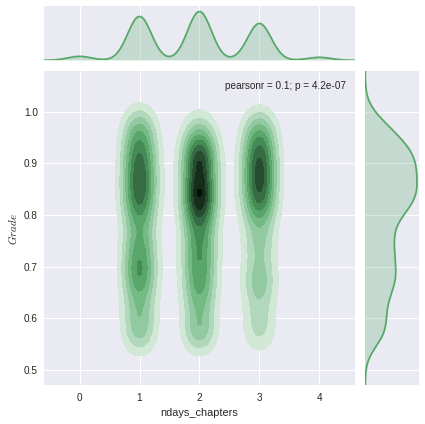

In [708]:
ax = sns.jointplot(x='LoE_DI',y='grade', data=MITx_600x_active, kind='kde', color="g")
ax.ax_joint.collections[0].set_alpha(0)
ax.set_axis_labels('ndays_chapters', "$Grade$")

Common Obj: Most students recieve a B


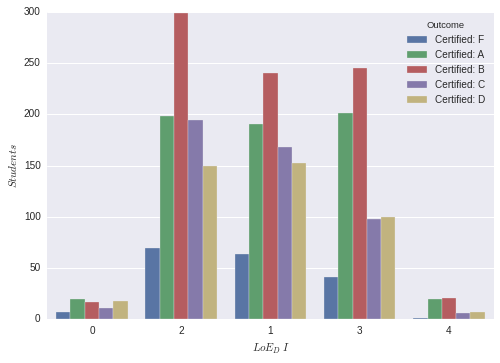

In [709]:
ax = sns.countplot(x='LoE_DI', hue="Outcome", data=MITx_600x_active)
ax.set(ylabel='$Students$')
ax.set(xlabel='$Location$')
print 'Common Obj: Most students recieve a B'

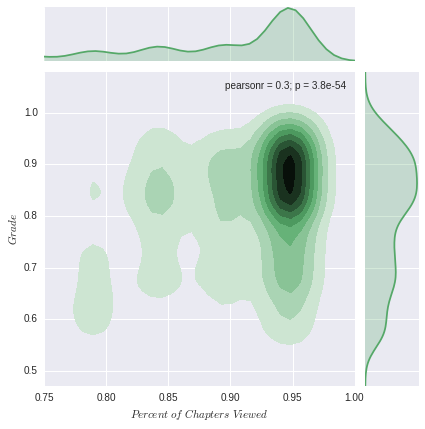

In [684]:
ax = sns.jointplot(x='%max_chapters_viewed',y='grade', data=MITx_600x_active, kind='kde', color="g", xlim=(0.75,1))
ax.ax_joint.collections[0].set_alpha(0)
ax.set_axis_labels("$Percent$ $of$ $Chapters$ $Viewed$", "$Grade$")
#'%max_chapters_viewed'

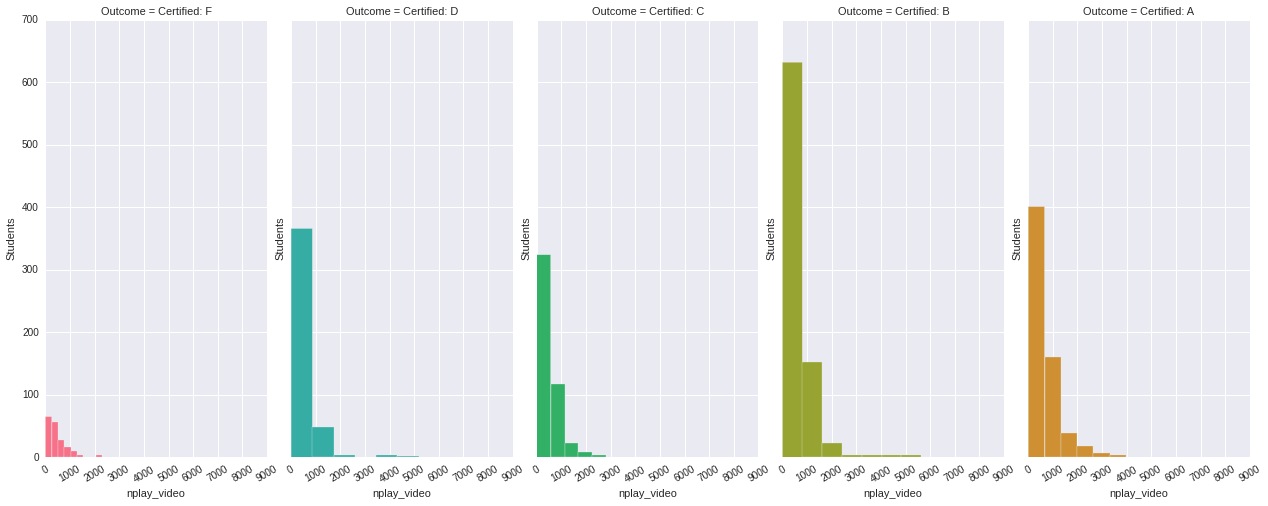

In [537]:
nplay_video = sns.FacetGrid(MITx_600x_active, col='Outcome', 
                            col_order=["Certified: F", "Certified: D","Certified: C","Certified: B", "Certified: A"], 
                            hue='Outcome', size=7, aspect=.5,palette=sns.color_palette("husl", 8))
nplay_video = nplay_video.map(plt.hist, 'nplay_video').set(ylabel='Students').set_xticklabels(rotation=30)
# nplay_videoPD = sns.FacetGrid(MITx_600x_active, col='Outcome', 
#                               col_order=["Certified: F", "Certified: D","Certified: C","Certified: B", "Certified: A"], 
#                               hue='Outcome', size=7, aspect=.5,palette=sns.color_palette("husl", 8))
# nplay_videoPD = nplay_videoPD.map(plt.hist, 'nplay_video_per_day').set(ylabel='Students').set_xticklabels(rotation=30)

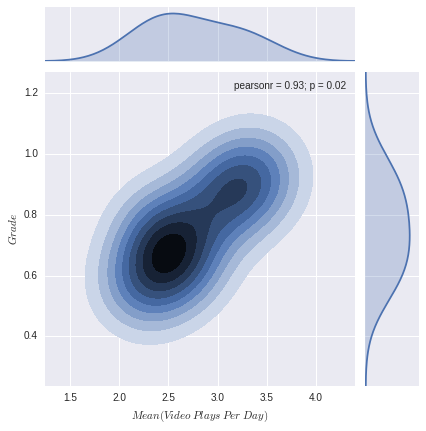

In [143]:
ax = sns.jointplot(x='nplay_video_per_day',y='grade', data=mean_MITx_600x, 
                   kind='kde', color="b") #.set(xlabel='Video Plays Per Day')
# ax.plot_joint(plt.scatter, c="w", s=30, linewidth=1)
ax.ax_joint.collections[0].set_alpha(0)
ax.set_axis_labels("$Mean$$($$Video$ $Plays$ $Per$ $Day$$)$", "$Grade$");
# Indicate Means

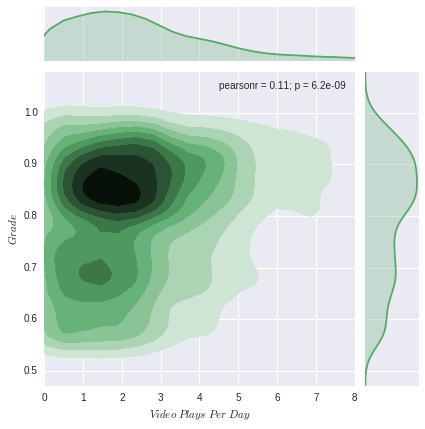

In [59]:
ax = sns.jointplot(x='nplay_video_per_day',y='grade', data=MITx_600x_active, 
                   kind='kde', color="g", xlim=(0,8)) #.set(xlabel='Video Plays Per Day')
# ax.plot_joint(plt.scatter, c="w", s=30, linewidth=1)
ax.ax_joint.collections[0].set_alpha(0)
ax.set_axis_labels("$Video$ $Plays$ $Per$ $Day$", "$Grade$")
# Indicate Means

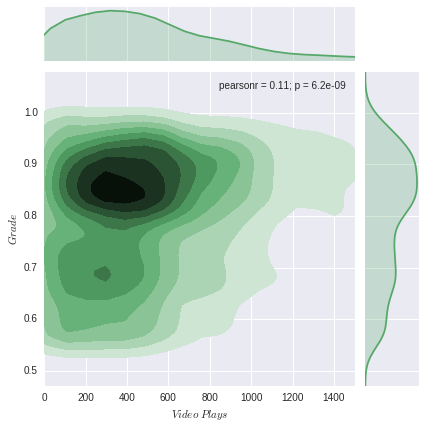

In [63]:
ax = sns.jointplot(x='nplay_video',y='grade', data=MITx_600x_active, 
                   kind='kde', color="g", xlim=(0,1500)) #.set(xlabel='Video Plays Per Day')
# ax.plot_joint(plt.scatter, c="w", s=30, linewidth=1)
ax.ax_joint.collections[0].set_alpha(0)
ax.set_axis_labels("$Video$ $Plays$", "$Grade$")
# Indicate Means

In [573]:
# sns.kdeplot(mean_MITx_600x['nplay_video/nevents'], mean_MITx_600x['grade'], shade=True)

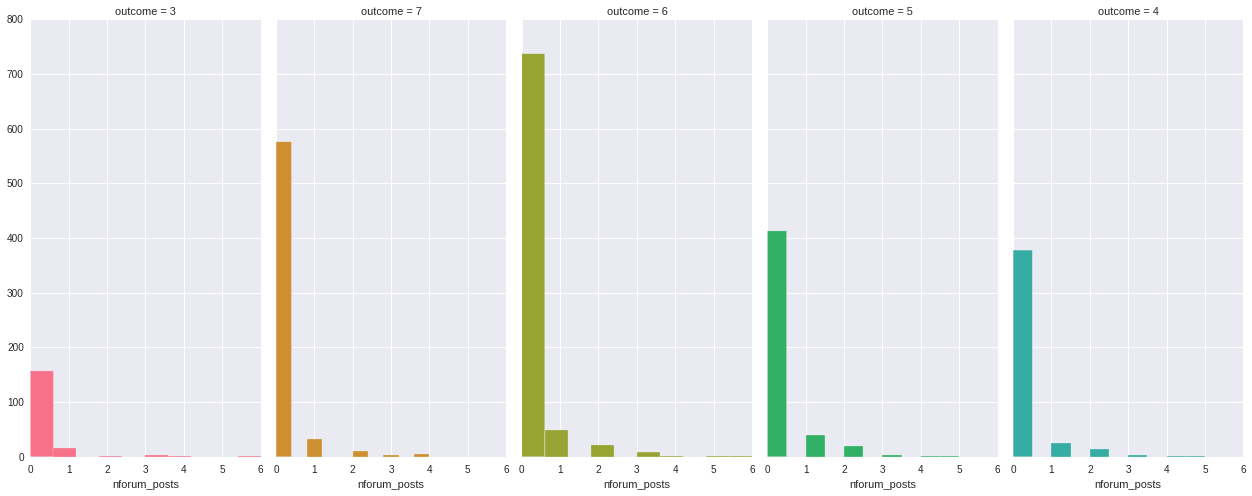

In [607]:
nforum_posts = sns.FacetGrid(MITx_600x_active, col="outcome", hue="outcome", size=7, aspect=.5, 
                        palette=sns.color_palette("husl", 8))
nforum_posts = nforum_posts.map(plt.hist, 'nforum_posts')
# # nforum_postsPD = sns.FacetGrid(MITx_600x_active, col="outcome", hue="outcome", size=7, aspect=.5, 
# #                         palette=sns.color_palette("husl", 8))
# # nforum_postsPD = nforum_postsPD.map(plt.hist, 'nforum_posts_per_day')

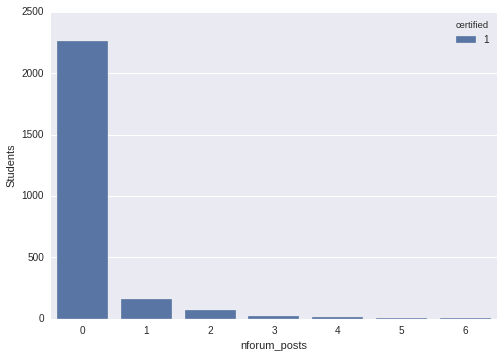

In [685]:
# ax = sns.jointplot(x='nforum_posts_per_day',y='grade', data=MITx_600x_active, kind='kde', color="g")
# Indicate Means
ax = sns.countplot(x='nforum_posts', hue="certified", data=MITx_600x_active, order=[0,1,2,3,4,5,6]).set(ylabel='Students')

In [695]:
print '0.89 didnt post forums'

0.89 didnt post forums


In [540]:
# nchaptersEV = sns.FacetGrid(MITx_600x_active, col='Outcome', 
#                             col_order=["Certified: F", "Certified: D","Certified: C","Certified: B", "Certified: A"], 
#                             hue='Outcome', size=7, aspect=.5,palette=sns.color_palette("husl", 8))
# nchaptersEV = nchaptersEV.map(plt.hist, 'nchapters/nevents').set(ylabel='Students').set_xticklabels(rotation=30)
# nplay_videoEV = sns.FacetGrid(MITx_600x_active, col='Outcome', 
#                               col_order=["Certified: F", "Certified: D","Certified: C","Certified: B", "Certified: A"], 
#                               hue='Outcome', size=7, aspect=.5,palette=sns.color_palette("husl", 8))
# nplay_videoEV = nplay_videoEV.map(plt.hist, 'nplay_video/nevents').set(ylabel='Students').set_xticklabels(rotation=30)
# nforum_postsEV = sns.FacetGrid(MITx_600x_active, col='Outcome', 
#                                col_order=["Certified: F", "Certified: D","Certified: C","Certified: B", "Certified: A"], 
#                                hue='Outcome', size=7, aspect=.5,palette=sns.color_palette("husl", 8))
# nforum_postsEV = nforum_postsEV.map(plt.hist, 'nforum_posts/nevents').set(ylabel='Students').set_xticklabels(rotation=30)

In [559]:
# age = sns.FacetGrid(MITx_600x_active, col='Outcome', 
#                     col_order=["Certified: F", "Certified: D","Certified: C","Certified: B", "Certified: A"], 
#                     hue='Outcome', size=7, aspect=.5,palette=sns.color_palette("husl", 8))
# age = age.map(sns.distplot, 'age').set(ylabel='Students').set_xticklabels(rotation=30)

In [10]:
mooc.columns

Index([u'grade', u'userid_DI', u'course_id', u'certified', u'viewed',
       u'explored', u'ndays_act', u'nplay_video', u'nchapters', u'nevents',
       u'nforum_posts', u'final_cc_cname_DI', u'LoE_DI', u'YoB', u'gender',
       u'start_time_DI', u'last_event_DI', u'letter_grade', u'outcome',
       u'institution', u'course_code', u'semester', u'start_year', u'age',
       u'age_range', u'max_nchapters', u'%max_chapters_viewed',
       u'max_nplay_video', u'%max_videos_viewed', u'max_nforum_posts',
       u'%max_posts_viewed', u'max_nevents', u'%max_events', u'max_ndays_act',
       u'%max_days_act', u'nplay_video/nevents', u'nchapters/nevents',
       u'nforum_posts/nevents', u'nevents_per_day', u'nplay_video_per_day',
       u'nchapters_per_day', u'nforum_posts_per_day', u'ndays_play_video',
       u'ndays_chapters', u'ndays_forum_posts'],
      dtype='object')

In [37]:
# 'grade', 'certified', 
#'userid_DI', 'course_id',
#'max_nchapters','max_nplay_video',
#'YoB'
#'start_time_DI','last_event_DI','start_year',
outcome_cols=['outcome',# Y: 0
              'viewed','explored',# 1,2
              'nplay_video/nevents','nforum_posts/nevents',# Act Type: 3,4
              'nevents_per_day','nchapters_per_day','nplay_video_per_day','nforum_posts_per_day',# ActPerDay: 5-8
              'ndays_play_video','ndays_chapters','ndays_forum_posts',# DaysPerAct: 9-11
              '%max_chapters_viewed',# Temp %Complete: 12
              'ndays_act','nplay_video','nchapters','nevents','nforum_posts',# Act Counts: 13-17
              'LoE_DI','age']# Demo: 18-21; Binarize from 22 'age',
              # Course: 22-24 ,'final_cc_cname_DI','gender'

outcome_mooc = mooc[mooc['institution']=='MITx']
outcome_mooc_inv = outcome_mooc[outcome_cols][outcome_mooc['course_code']!="6.00x"]
outcome_mooc_600x = mooc[outcome_cols][mooc['course_code']=="6.00x"]

In [35]:
print len(mooc)
print len(outcome_mooc)
print len(outcome_mooc_inv)
print len(outcome_mooc_600x)
outcome_cols[:20]

129843
104644
53207
51437


['outcome',
 'viewed',
 'explored',
 'nplay_video/nevents',
 'nforum_posts/nevents',
 'nevents_per_day',
 'nchapters_per_day',
 'nplay_video_per_day',
 'nforum_posts_per_day',
 'ndays_play_video',
 'ndays_chapters',
 'ndays_forum_posts',
 '%max_chapters_viewed',
 'ndays_act',
 'nplay_video',
 'nchapters',
 'nevents',
 'nforum_posts',
 'LoE_DI',
 'age']

In [44]:
y_HarvardX_cert = mooc_cert['certified'][mooc_cert['institution']=='HarvardX']
X_HarvardX_cert = pd.get_dummies(mooc_cert[cols_cert[1:]][mooc_cert['institution']=='HarvardX'])
y_HarvardX_PH207x = mooc_cert['certified'][mooc_cert['course_code'] == 'PH207x']
X_HarvardX_PH207x = X_HarvardX_cert[X_HarvardX_cert['course_code_PH207x'] == 1]

NameError: name 'mooc_cert' is not defined

In [29]:
explore(outcome_mooc_inv) 

Rows: 129843

outcome <type 'numpy.int64'>
[0 3 6 7 4 5]

viewed <type 'numpy.int64'>
[1]

explored <type 'numpy.int64'>
[0 1]

nplay_video/nevents <type 'numpy.float64'>
[  1.43540670e-02   1.52777778e-01   3.00000000e+00 ...,   1.39697322e-02
   7.42666172e-04   6.52985075e-03]

nforum_posts/nevents <type 'numpy.float64'>
[ 0.          0.00039355  0.00549451 ...,  0.00016598  0.00062539
  0.00077429]

nevents_per_day <type 'numpy.float64'>
[  2.04901961e+00   4.64516129e-01   1.25000000e-02 ...,   1.14000000e+01
   5.00125000e+01   3.36625000e+01]

nchapters_per_day <type 'numpy.float64'>
[ 0.01960784  0.01935484  0.0125      0.01754386  0.10784314  0.1         0.10625
  0.00645161  0.01875     0.01290323  0.00625     0.03125     0.00980392
  0.00877193  0.01052632  0.04375     0.11764706  0.02631579  0.0625
  0.08387097  0.07017544  0.01550388  0.03157895  0.025       0.0375
  0.03508772  0.02580645  0.00775194  0.05        0.09375     0.12280702
  0.10526316  0.06451613  0.0516129 

In [49]:
# ['Not Certified: F' 'Certified: A' 'Certified: B' 'Not Certified: C'
#  'Not Certified: D' 'Certified: C' 'Certified: D' 'Certified: F']
# result = concat([df1, df4], axis=1)
X = mooc[outcome_cols[1:]][mooc['institution']=="MITx"]
y_train = outcome_mooc_inv['outcome'] #.map({'Certified: A':0,'Certified: B':1,'Certified: C':2,'Certified: D':3,'Certified: F':4,
                                 #'Not Certified: C':5,'Not Certified: D':6,'Not Certified: F':7})
y_test = outcome_mooc_600x['outcome'] #.map({'Certified: A':0,'Certified: B':1,'Certified: C':2,'Certified: D':3,'Certified: F':4,
                                 #'Not Certified: C':5,'Not Certified: D':6,'Not Certified: F':7})
# X_train = pd.concat([outcome_mooc[outcome_cols[1:19]], pd.get_dummies(outcome_mooc[outcome_cols[20:]])], axis=1)
# X_test = pd.concat([outcome_mooc_600x[outcome_cols[1:]], pd.get_dummies(outcome_mooc_600x[outcome_cols[20:]])], axis=1)

X_train = outcome_mooc_inv[outcome_cols]
X_test = outcome_mooc_600x[outcome_cols]

In [23]:
y_train.unique()

array([0, 3, 6, 7, 4, 5])

In [50]:
pd.get_dummies(outcome_mooc_600x[outcome_cols[20:]]).head()

final_cc_cname_DI_Australia  final_cc_cname_DI_Bangladesh  \
377037                            0                             0   
377045                            0                             0   
377047                            0                             0   
377051                            0                             0   
377053                            0                             0   

        final_cc_cname_DI_Brazil  final_cc_cname_DI_Canada  \
377037                         0                         0   
377045                         0                         0   
377047                         0                         0   
377051                         0                         0   
377053                         0                         0   

        final_cc_cname_DI_China  final_cc_cname_DI_Colombia  \
377037                        0                           0   
377045                        0                           0   
377047                        0                           0   
377051                        0                           0   
377053                        0                           0   

        final_cc_cname_DI_Egypt  final_cc_cname_DI_France  \
377037                        0                         0   
377045                        0                         0   
377047                        0                         0   
377051                        0                         0   
377053                        0                         0   

        final_cc_cname_DI_Germany  final_cc_cname_DI_Greece    ...     \
377037                          0                         0    ...      
377045                          0                         0    ...      
377047                          0                         0    ...      
377051                          0                         0    ...      
377053                          0                         0    ...      

        final_cc_cname_DI_Poland  final_cc_cname_DI_Portugal  \
377037                         0                           0   
377045                         0                           0   
377047                         0                           0   
377051                         0                           0   
377053                         0                           0   

        final_cc_cname_DI_Russian Federation  final_cc_cname_DI_Spain  \
377037                                     0                        0   
377045                                     0                        0   
377047                                     0                        0   
377051                                     0                        0   
377053                                     0                        0   

        final_cc_cname_DI_Ukraine  final_cc_cname_DI_United Kingdom  \
377037                          0                                 0   
377045                          0                                 0   
377047                          0                                 0   
377051                          0                                 1   
377053                          0                                 0   

        final_cc_cname_DI_United States  final_cc_cname_DI_Unknown/Other  \
377037                                0                                0   
377045                                0                                0   
377047                                0                                0   
377051                                0                                0   
377053                                0                                0   

        gender_f  gender_m  
377037         0         1  
377045         0         1  
377047         0         1  
377051         0         1  
377053         1         0  

[5 rows x 36 columns]

In [119]:
def get_importances(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_rank = []
    i = len(model)
    print "Number of most important features: ", len(model)
    print("Feature ranking:") # create table
    f_range = []
    for f in range(len(model)):
        f_range.append(f + 1)
        top_rank.append(indices[f])
        print("%d. %s" % (f + 1, X[top_rank].columns[f]))
#         print("%d. # %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], 
#                                     X_let[top_rank].columns[f]))
    ax = sns.barplot(range(len(indices[0:10])),importances[indices[0:10]], palette="Set3")
    ax.set(ylabel="Importance")
    ax.set(xlabel="Rank")
    
#     ax.set_axis_labels("$Feature Ranks$", "$Grade$");
    
def eval_estimator(estimator, X_train, y_train, X_test, y_test, target):
    model = estimator().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

#     cr = classification_report(y_test, y_pred, target_names=['F', 'A', 'B', 'C', 'D'])
    cr = classification_report(y_test, y_pred)
# , target_names=['Not Certified: F','Certified: A','Certified: B',
#                                                                     'Not Certified: C','Not Certified: D',
#                                                                     'Certified: C','Certified: D','Certified: F']

    asf = accuracy_score(y_test, y_pred)
    asn = accuracy_score(y_test, y_pred, normalize=False)

    zolf = zero_one_loss(y_test, y_pred) 
    zoln = zero_one_loss(y_test, y_pred, normalize=False)

    print 'Target:', target
    print '%s %-30s' % ('Estimator:', estimator.__name__)
    print
    print 'Confusion Matrix:'
    print cm
    print
    print 'Classification_Report:'
    print cr
    print
    print '%s %.4f %s' % ("Accuracy Score:", asf, '- fraction of correctly classified samples')
    print '%s %d %s' % ("               ", asn, ' - number of correctly classified samples')
    print '%s %.4f %s' % (" Zero One Loss:", zolf, '- return the fraction of misclassifications')
    print '%s %d %s' % ("               ", zoln, '  - number of misclassifications')
    print

    get_importances(model)

Target: MITx: 6.00x
Estimator: RandomForestClassifier        

Confusion Matrix:
[[48898     0     0     0     0     0]
 [    1    71   106     4     0     0]
 [    0    14   406     4     3     0]
 [    1     1    69   406     1     0]
 [    0     0     3     5   814     0]
 [    0     0     1     0     0   629]]

Classification_Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     48898
          3       0.83      0.39      0.53       182
          4       0.69      0.95      0.80       427
          5       0.97      0.85      0.91       478
          6       1.00      0.99      0.99       822
          7       1.00      1.00      1.00       630

avg / total       1.00      1.00      1.00     51437


Accuracy Score: 0.9959 - fraction of correctly classified samples
                51224  - number of correctly classified samples
 Zero One Loss: 0.0041 - return the fraction of misclassifications
                213   - number of m

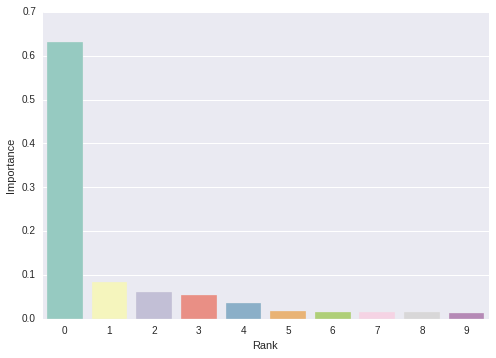

In [120]:
eval_estimator(RandomForestClassifier, X_train, y_train, X_test, y_test, "MITx: 6.00x")

In [115]:
plot_cols = ['grade','nchapters/nevents','nplay_video/nevents','nforum_posts/nevents',
                'nevents_per_day','nchapters_per_day','nplay_video_per_day','nforum_posts_per_day',
                'ndays_events','ndays_play_video','ndays_chapters','ndays_forum_posts',
                '%max_chapters_viewed','%max_videos_viewed',
                'age','age_range','LoE_DI','final_cc_cname_DI','gender','institution','course_code','semester']
mooc_plot = mooc[plot_cols]

KeyError: "['ndays_events'] not in index"

In [116]:
sns.pairplot(mooc_plot)

NameError: name 'mooc_plot' is not defined

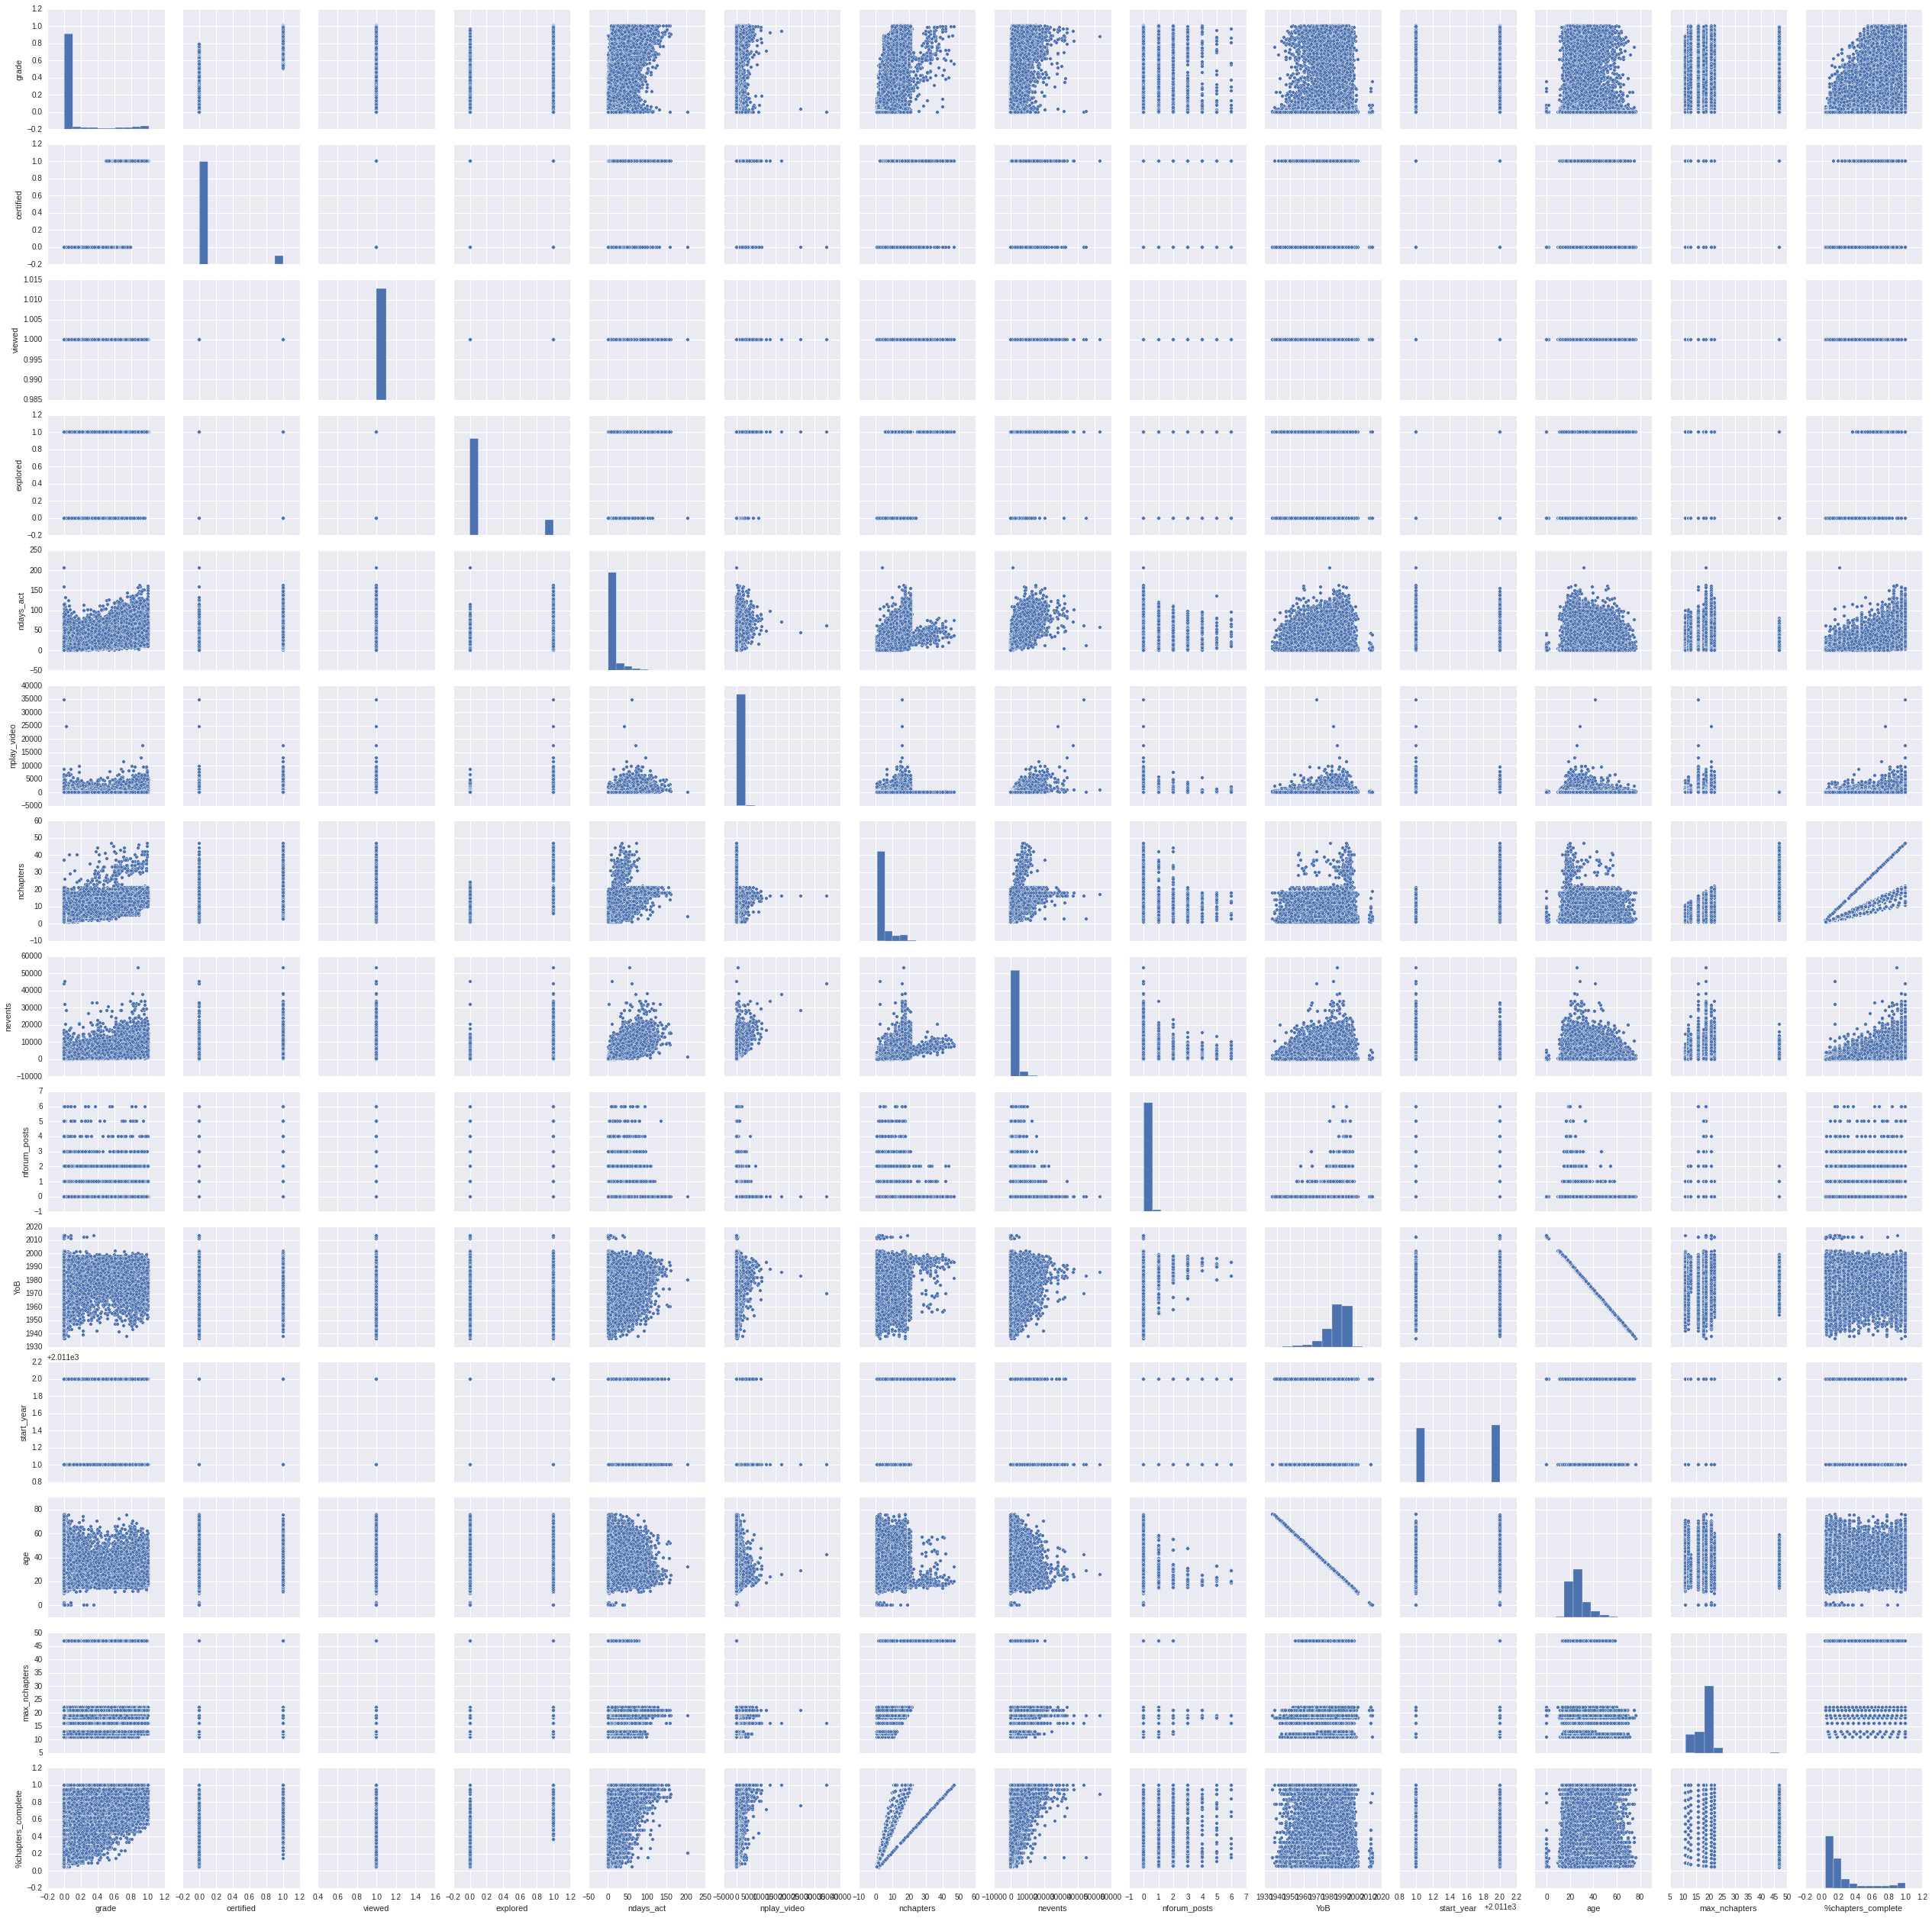

In [43]:
sns.pairplot(mooc)

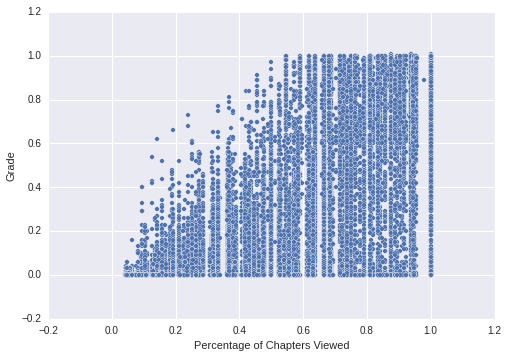

In [136]:
plt.scatter(mooc['%max_chapters_viewed'],mooc['grade'])
plt.ylabel('Grade')
plt.xlabel('Percentage of Chapters Viewed')

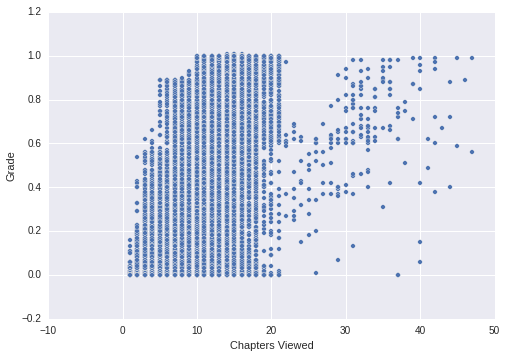

In [135]:
plt.scatter(mooc['nchapters'],mooc['grade'])
plt.ylabel('Grade')
plt.xlabel('Chapters Viewed')

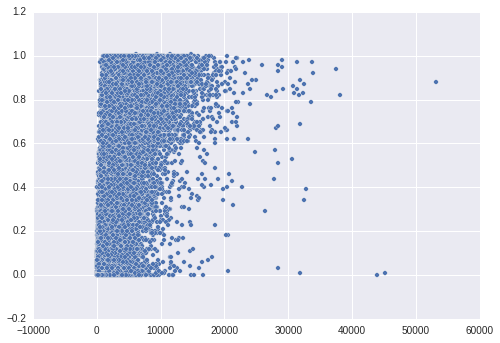

In [45]:
plt.scatter(mooc['nevents'],mooc['grade'])

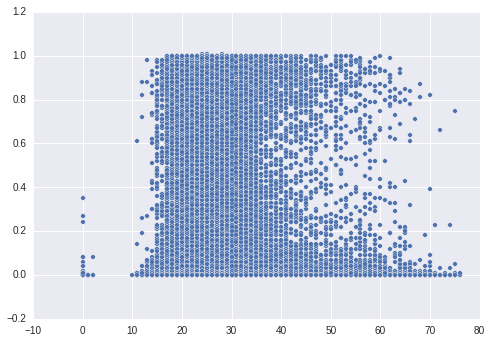

In [47]:
plt.scatter(mooc['age'],mooc['grade'])

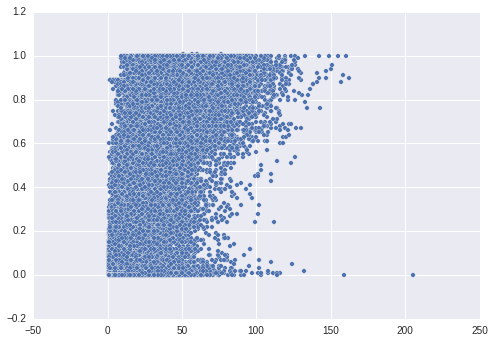

In [48]:
plt.scatter(mooc['ndays_act'],mooc['grade'])

In [2]:
cols = ['course_id', 'userid_DI', 'registered', 'viewed', 'explored', 'certified', 
        'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender', 'grade', 'start_time_DI', 
        'last_event_DI', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 
        'roles', 'incomplete_flag']

cols_grade = ['grade', 
    'viewed','explored','ndays_act','nplay_video','%max_nchapters_complete','nevents','nforum_posts','register_duration',
    'LoE_DI','age','age_range','final_cc_cname_DI','gender',
    'institution','course_code', 'semester','start_year']
cols_letter_grade = ['letter_grade',
    'viewed','explored','ndays_act','nplay_video','%max_nchapters_complete','nevents','nforum_posts','register_duration',
    'LoE_DI','age','age_range','final_cc_cname_DI','gender',
    'institution','course_code', 'semester','start_year']
cols_cert = ['certified', 
    'viewed','explored','ndays_act','nplay_video','%max_nchapters_complete','nevents','nforum_posts','register_duration',
    'LoE_DI','age','age_range','final_cc_cname_DI','gender',
    'institution','course_code', 'semester','start_year']

# cols_result = ['result', 'viewed', 'explored','ndays_act','nplay_video','nchapters','nevents','nforum_posts',
#          'YoB','LoE_DI','final_cc_cname_DI','gender','age_range']
# mooc_result = mooc[cols_result]

# mooc_grade = mooc[cols_grade]
mooc_letter = mooc[cols_letter_grade]
mooc_cert = mooc[cols_cert]

# HarvardX_cert = mooc_cert[mooc_cert.school == 'HarvardX']
# MITx_cert = mooc_cert[mooc_cert.school == 'MITx']
# HarvardX_letter = mooc_letter[mooc_letter.school == 'HarvardX']
# MITx_letter = mooc_letter[mooc_letter.school == 'MITx']

NameError: name 'mooc' is not defined

In [18]:
course_enrollment = pd.DataFrame(mooc['course_code'].value_counts())
institution_enrollment = pd.DataFrame(mooc['institution'].value_counts())
letter_grade = pd.DataFrame(mooc['letter_grade'].value_counts())
# Use groupby!!!!!
print 'HarvardX courses:', mooc['course_code'][mooc['institution'] == 'HarvardX'].unique()
print 'MITx courses:', mooc['course_code'][mooc['institution'] == 'MITx'].unique()

HarvardX courses: ['PH207x' 'PH278x']
MITx courses: ['14.73x' '8.02x' '6.00x' '6.002x' '7.00x' '8.MReV' '2.01x' '3.091x']


In [22]:
letter_grade

0
F  120137
A    3632
B    2829
C    1756
D    1569

In [20]:
course_enrolment

0
6.00x   51503
PH207x  16509
6.002x  15918
14.73x  10654
8.02x   10545
PH278x   8682
7.00x    7633
3.091x   6026
2.01x    2099
8.MReV    354

In [21]:
institution_enrolment

0
MITx      104732
HarvardX   25191

In [90]:
explore(mooc)

Rows: 129923

grade <type 'numpy.float64'>
[ 0.    0.01  0.29  0.18  0.1   0.11  0.02  0.13  0.92  0.09  0.89  0.99
  0.04  0.93  0.15  0.38  0.43  0.05  0.22  0.45  0.07  0.83  0.77  0.96
  0.03  0.33  0.06  0.6   0.87  0.94  0.2   1.    0.84  0.91  0.34  0.08
  0.23  0.39  0.98  0.75  0.85  0.8   0.95  0.97  0.88  0.26  0.12  0.35
  0.31  0.36  0.16  0.37  0.66  0.9   0.42  0.72  0.4   0.14  0.25  0.51
  0.28  0.56  0.24  0.86  0.57  0.53  0.21  0.49  0.67  0.17  0.69  0.55
  0.32  0.76  0.64  0.3   0.73  0.48  0.79  0.81  0.5   0.7   0.46  0.19
  0.52  0.78  0.63  0.68  0.27  0.58  0.62  0.47  0.54  0.44  0.74  0.61
  0.65  0.41  0.82  0.59  0.71  1.01]

userid_DI <type 'str'>
['MHxPC130237753' 'MHxPC130519020' 'MHxPC130123976' ..., 'MHxPC130436096'
 'MHxPC130119974' 'MHxPC130390619']

course_id <type 'str'>
['HarvardX/PH207x/2012_Fall' 'HarvardX/PH278x/2013_Spring'
 'MITx/14.73x/2013_Spring' 'MITx/8.02x/2013_Spring' 'MITx/6.00x/2012_Fall'
 'MITx/6.00x/2013_Spring' 'MITx/6.002x/2012

###Open Issues List
* 1. Solidify representations of features
* 1. Don't binarize course, map values, because students can take multiple courses
* 1. Interpret remaining  metrics
* 1. COURSE DATA IN TRAIN, NOOOOO!!!!
* 1. Remove 'age' outliers
* 1. Binning: Determine demographics of students scoring certain letter grades
* 3. multilabel !?!?!?!
* 2. Provide scenario: edX, institution, course characterstics
* Transformation: start year needs to be generaated from 'semester', not dates!!!!
* 2. Modeling: Cross-Val-Predict??
* 2. Modeling: Relate over & under fitting
* 3. Classification: Use other types of Ys
* 2. Fit Models with top features and interpret

* Heat maps
* EDA!!!!


* Forests takes both
* Customize ds for each est.
#### Debuging
* Handling 0 grades???
* Missing 60k rows when modeling!?!?!?! 

####Questions
* Clustering: Determine demographics of students scoring certain letter grades
    * Clusters demo per 'letter grade' 
    * plop in  numericals ???
    * records per grade ???
* multilabel !?!?!?!
* Handling 0 grades???

####Dataset
* row = student, course
* students take multiple courses
* 

####Product
* Dashboard: Contents of dashboard based on finding significant features that determine grad
    * Per Institution
    * Per Course
* App: Determin success my metric slide bar
    

####Viszualization
* Exploration
    * Different colours for institution
    * Plot Student Age Ranges
    * Country v. Grade Bar Graph:
    * Letter Grade Bar Graph
* Post_Modeling
    * Per Institution: grade v. "significant metric(s)"

###Transformation & Modeling1
* multilabel !?!?!?!
* COURSE DATA IN TRAIN, NOOOOO!!!!
* start year needs to be generaated from 'semester', not dates!!!!

####Cleansing


####Regression
* grade: different grade transformation

####Model Evaluation
* Get accuracy of training and test: 
    * high training/low test = Over fitting
    * low both underfitting
    * Modeling: Cross-Val-Predict??

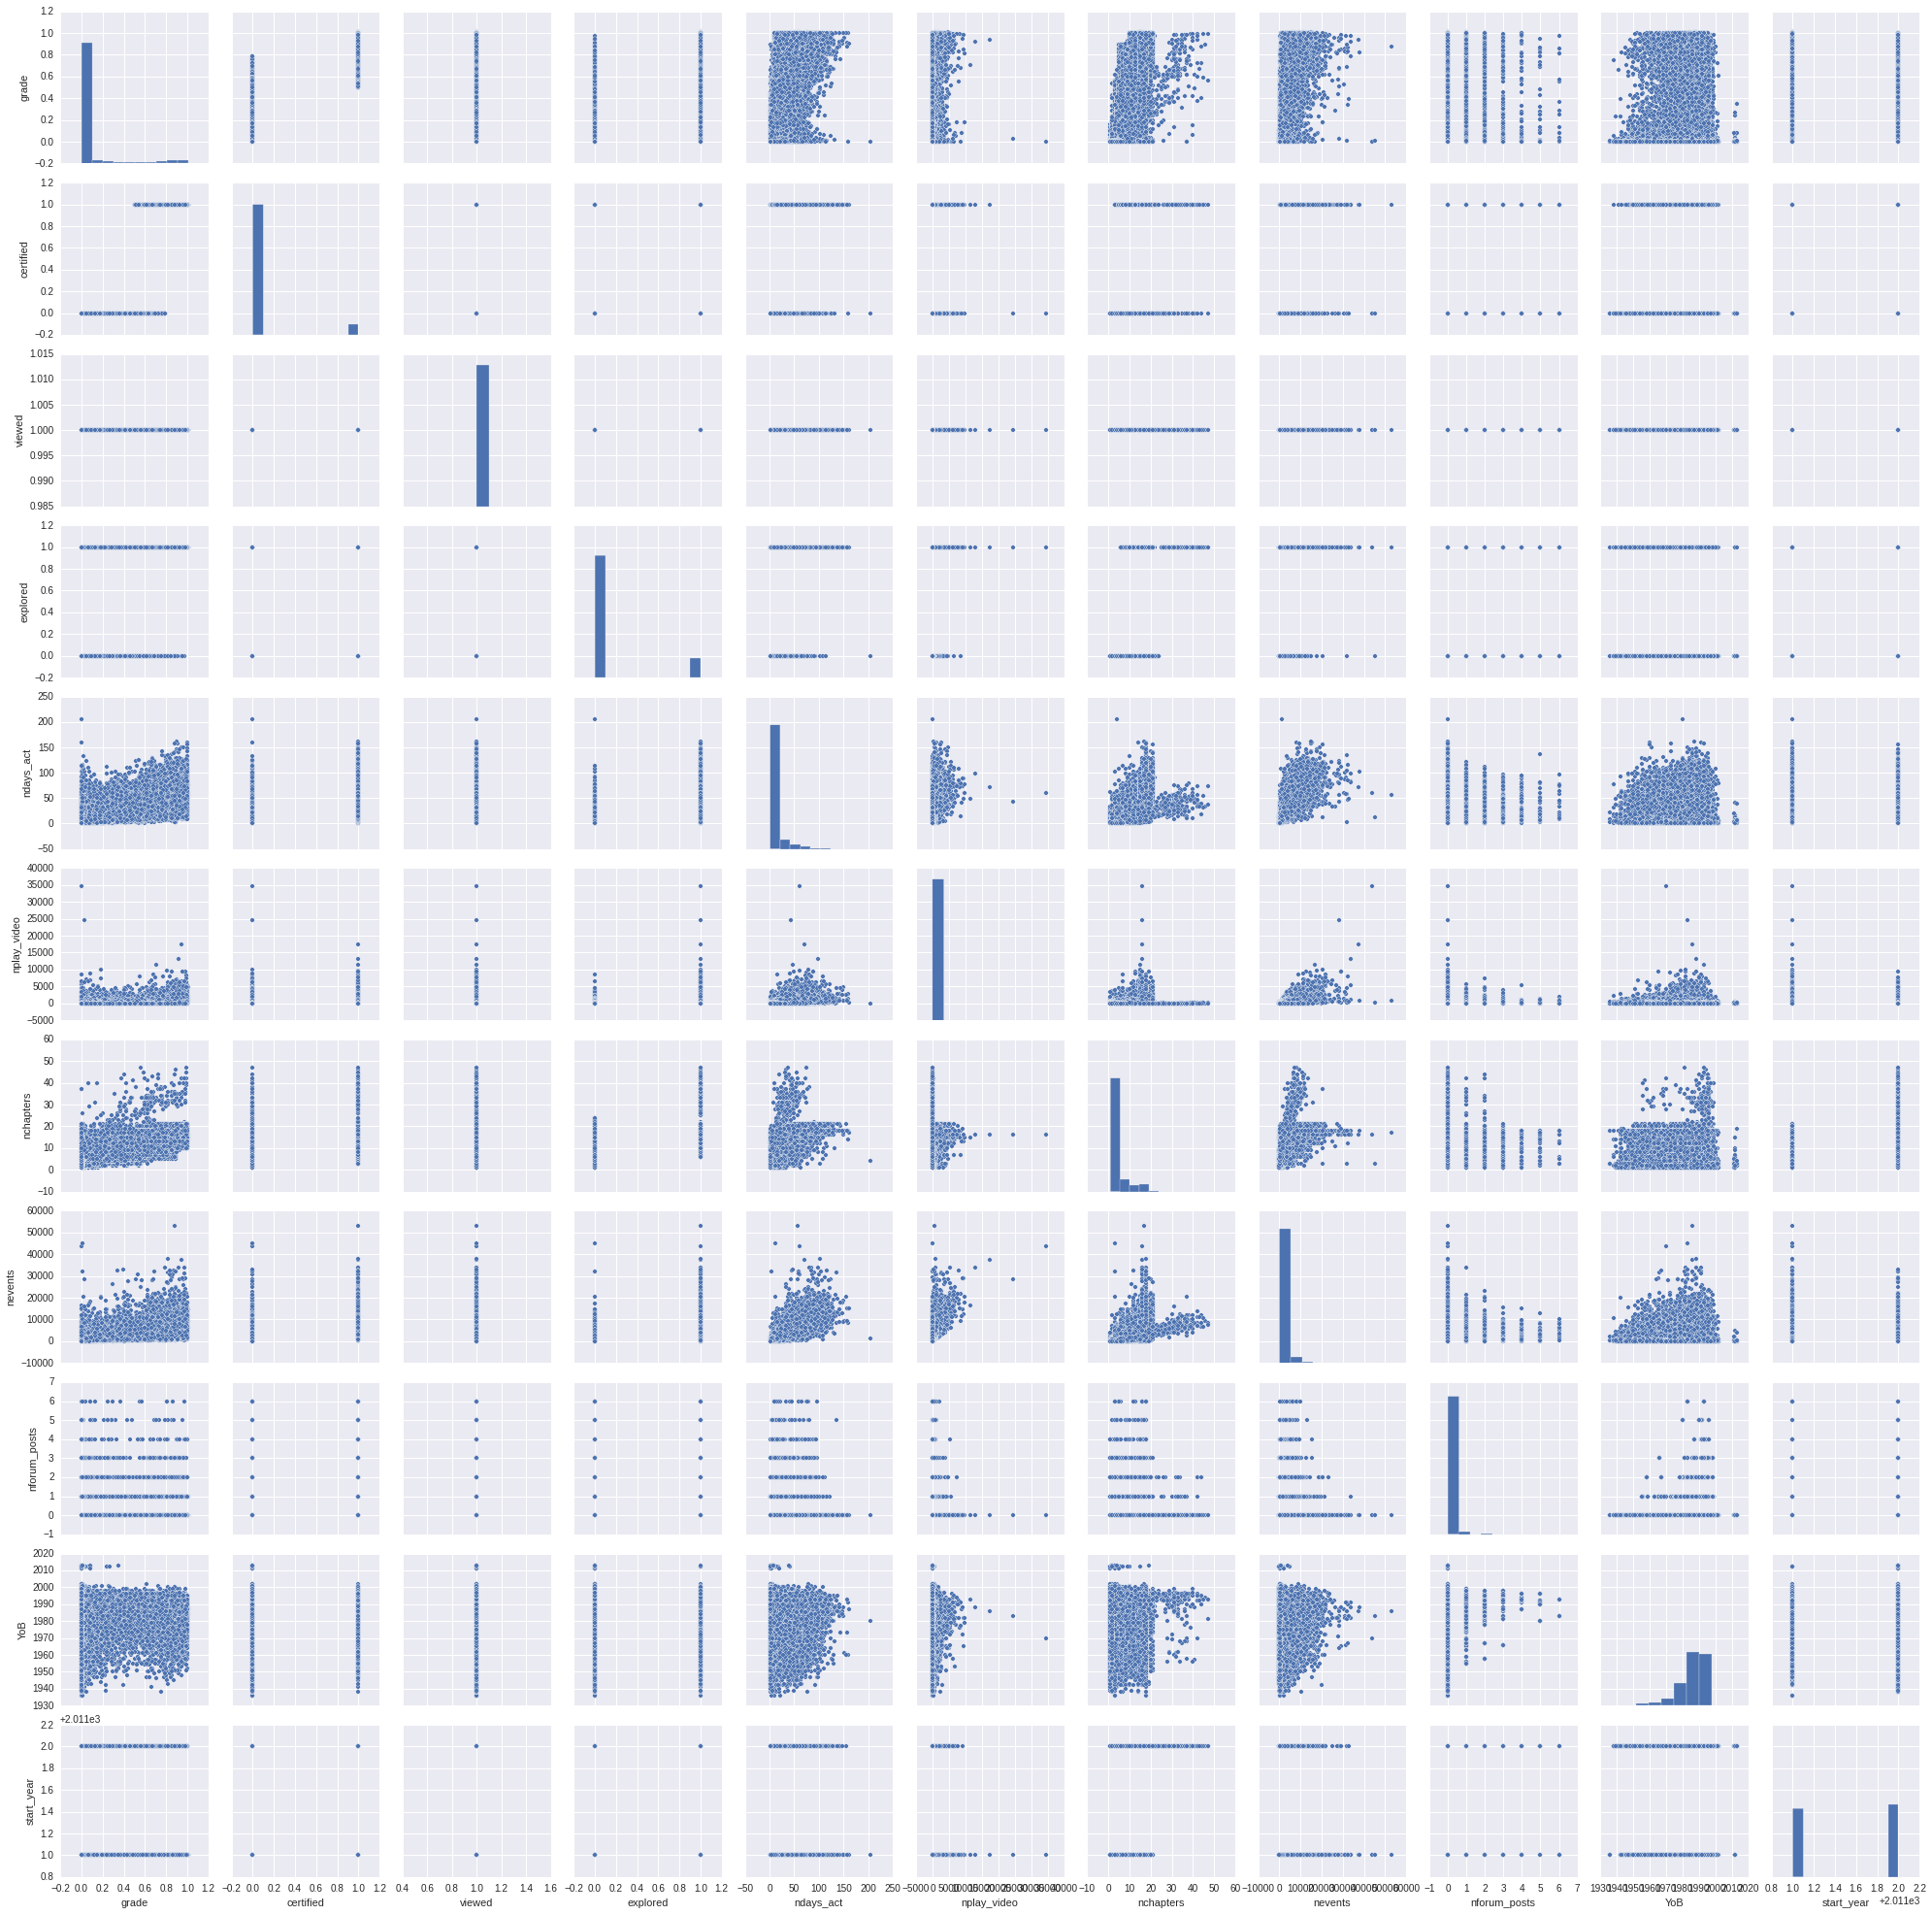

In [130]:
# sns.distplot(mooc['grade'])
# sns.distplot(mooc['YoB'])
# sns.distplot(mooc['age_range'], hist=True) > Error
# sns.distplot(mooc['nplay_video'])
#sns.pairplot(mooc)
# sns.distplot(mooc['grade'] == 0)

In [1]:
y_let = mooc_letter['letter_grade'].map({'F':0, 'A':1, 'B':2, 'C':3, 'D':4})
X_let = pd.get_dummies(mooc_letter[cols_letter_grade[1:]])

y_HarvardX_letter = mooc_letter['letter_grade'][mooc_letter['institution']=='HarvardX'].map({'F':0, 'A':1, 'B':2, 'C':3, 'D':4})
X_HarvardX_letter = pd.get_dummies(mooc_letter[cols_letter_grade[1:]][mooc['institution']=='HarvardX'])

y_MITx_letter = mooc_letter['letter_grade'][mooc_letter['institution']=='MITx'].map({'F':0, 'A':1, 'B':2, 'C':3, 'D':4})
X_MITx_letter = pd.get_dummies(mooc_letter[cols_letter_grade[1:]][mooc_letter['institution']=='MITx'])

y_HarvardX_cert = mooc_cert['certified'][mooc_cert['institution']=='HarvardX']
X_HarvardX_cert = pd.get_dummies(mooc_cert[cols_cert[1:]][mooc_cert['institution']=='HarvardX'])

y_MITx_cert = mooc_cert['certified'][mooc_cert['institution']=='MITx']
X_MITx_cert = pd.get_dummies(mooc_cert[cols_cert[1:]][mooc_cert['institution']=='MITx'])

# COURSE DATA IN TRAIN, NOOOOO!!!!
# y_HarvardX_PH207x_train = X_HarvardX_cert['certified'][]
y_HarvardX_PH207x = mooc_cert['certified'][mooc_cert['course_code'] == 'PH207x']
X_HarvardX_PH207x = X_HarvardX_cert[X_HarvardX_cert['course_code_PH207x'] == 1]
# X_HarvardX_PH207x = pd.get_dummies(mooc_cert[cols_cert[1:]][mooc_cert['course_name'] == 'PH207x'])

y_MITx_600x = mooc_cert['certified'][mooc_cert['course_code'] == '6.00x']
X_MITx_600x = pd.get_dummies(mooc_cert[cols_cert[1:]][mooc_cert['course_code'] == '6.00x'])

# 'semester'

# Add Shuffling
X_train_let, X_test_let, y_train_let, y_test_let = train_test_split(X_let, y_let, test_size=0.25, random_state=777)

X_train_H_let, X_test_H_let, y_train_H_let, y_test_H_let = train_test_split(
    X_HarvardX_letter, y_HarvardX_letter, test_size=0.25, random_state=777)

X_train_M_let, X_test_M_let, y_train_M_let, y_test_M_let = train_test_split(
    X_MITx_letter, y_MITx_letter, test_size=0.25, random_state=777)

X_train_H_cert, X_test_H_cert, y_train_H_cert, y_test_H_cert = train_test_split(
    X_HarvardX_cert, y_HarvardX_cert, test_size=0.25, random_state=777)

X_train_M_cert, X_test_M_cert, y_train_M_cert, y_test_M_cert = train_test_split(
    X_MITx_cert, y_MITx_cert, test_size=0.25, random_state=777)

X_train_H_PH207x, X_test_H_PH207x, y_train_H_PH207x, y_test_H_PH207x = train_test_split(
    X_HarvardX_PH207x, y_HarvardX_PH207x, test_size=0.25, random_state=777)

NameError: name 'mooc_letter' is not defined

In [103]:
# print y_HarvardX_PH207x
# print X_HarvardX_cert.columns
# print mooc_cert['certified'][mooc_cert['course_name'] == 'PH207x']
# print mooc_cert[cols_cert[1:]][mooc_cert['course_name'] == 'PH207x'].columns
# print X_HarvardX_cert['course_name_PH207x']
# print X_HarvardX_cert['course_name_PH207x']

In [13]:
conf_matrixs, class_reports, acc_score_fracts = [],[],[]
acc_score_nums, zero_one_loss_fracts, zero_one_loss_nums = [],[],[]
y_preds, models = [],[]

def multiClass_eval(X_train, y_train, X_test, y_test):
    global conf_matrixs, class_reports, acc_score_fracts, acc_score_nums, zero_one_loss_fracts, zero_one_loss_nums 
    global y_preds, models
    
    conf_matrixs, class_reports, acc_score_fracts = [],[],[]
    acc_score_nums, zero_one_loss_fracts, zero_one_loss_nums = [],[],[]
    y_preds, models = [],[]
    for estimator in (LogisticRegression, 
                     KNeighborsClassifier,
                     GaussianNB,
                     DecisionTreeClassifier,
                     RandomForestClassifier):

        model = estimator().fit(X_train, y_train)
        models.append(model)

        y_pred = model.predict(X_test)
        y_preds.append(y_pred)

        cm = confusion_matrix(y_test, y_pred)
        conf_matrixs.append(cm)

        cr = classification_report(y_test, y_pred, target_names=['F', 'A', 'B', 'C', 'D'])
        
        class_reports.append(cr)

        asf = accuracy_score(y_test, y_pred)
        acc_score_fracts.append(asf)

        asn = accuracy_score(y_test, y_pred, normalize=False)
        acc_score_nums.append(asn)

        zolf = zero_one_loss(y_test, y_pred) 
        zero_one_loss_fracts.append(zolf)

        zoln = zero_one_loss(y_test, y_pred, normalize=False)
        zero_one_loss_nums.append(zoln)

        print '%s %-30s' % ('Estimator:', estimator.__name__)
        print
        print 'Confusion Matrix:'
        print cm
        print
        print 'Classification_Report:'
        print cr
        print
        print '%s %.4f %s' % ("Accuracy Score:", asf, '- fraction of correctly classified samples')
        print '%s %d %s' % ("               ", asn, ' - number of correctly classified samples')
        print '%s %.4f %s' % (" Zero One Loss:", zolf, '- return the fraction of misclassifications')
        print '%s %d %s' % ("               ", zoln, '  - number of misclassifications')
        print 

In [25]:
multiClass_eval(X_train_let, y_train_let, X_test_let, y_test_let)

Estimator: LogisticRegression            

Confusion Matrix:
[[29863   137    71     2    14]
 [  193   531   152     1     9]
 [  221   229   218     4    17]
 [  174   100   142     5    10]
 [  207    80    76     6    19]]

Classification_Report:
             precision    recall  f1-score   support

          F       0.97      0.99      0.98     30087
          A       0.49      0.60      0.54       886
          B       0.33      0.32      0.32       689
          C       0.28      0.01      0.02       431
          D       0.28      0.05      0.08       388

avg / total       0.93      0.94      0.93     32481


Accuracy Score: 0.9432 - fraction of correctly classified samples
                30636  - number of correctly classified samples
 Zero One Loss: 0.0568 - return the fraction of misclassifications
                1845   - number of misclassifications

Estimator: KNeighborsClassifier          

Confusion Matrix:
[[29642   241   126    50    28]
 [  379   319   112    42   

In [12]:
def get_importances(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_rank = []
    i = len(model)
    print "Number of most important features: ", len(model)
    print("Feature ranking:") # create table
    for f in range(len(model)):
        top_rank.append(indices[f])
        print("%d. (%f) %s" % (f + 1, importances[indices[f]], 
                                    X[top_rank].columns[f]))
#         print("%d. # %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], 
#                                     X_let[top_rank].columns[f]))

    plt.figure(figsize=(14,8))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color="b", align="center")
    plt.xticks(range(len(indices)), indices, rotation='vertical')
    plt.xlim([-1, 10])
    plt.show()

Number of most important features:  10
Feature ranking:
1. (0.241561) nevents
2. (0.127709) %max_nchapters_complete
3. (0.118310) ndays_act
4. (0.099817) register_duration
5. (0.090559) nplay_video
6. (0.063573) explored
7. (0.048350) age
8. (0.009648) LoE_DI_Bachelor's
9. (0.009142) final_cc_cname_DI_United States
10. (0.008447) final_cc_cname_DI_India


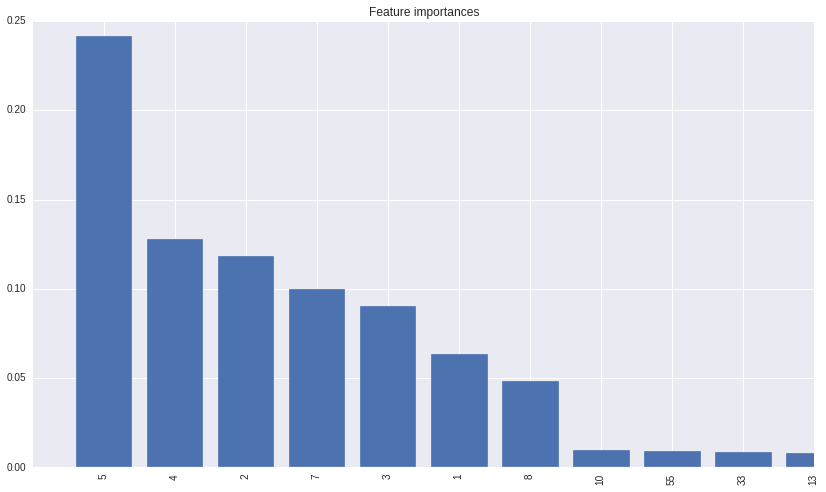

In [27]:
get_importances(models[4])

In [13]:
# X-VAL SCORE/PREDICT????
def eval_estimator(estimator, X_train, y_train, X_test, y_test, target):
    model = estimator().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

#     cr = classification_report(y_test, y_pred, target_names=['F', 'A', 'B', 'C', 'D'])
    cr = classification_report(y_test, y_pred, target_names=['Not Certified: F','Certified: A','Certified: B',
                                                                    'Not Certified: C','Not Certified: D',
                                                                    'Certified: C','Certified: D','Certified: F'])

    asf = accuracy_score(y_test, y_pred)
    asn = accuracy_score(y_test, y_pred, normalize=False)

    zolf = zero_one_loss(y_test, y_pred) 
    zoln = zero_one_loss(y_test, y_pred, normalize=False)

    print 'Target:', target
    print '%s %-30s' % ('Estimator:', estimator.__name__)
    print
    print 'Confusion Matrix:'
    print cm
    print
    print 'Classification_Report:'
    print cr
    print
    print '%s %.4f %s' % ("Accuracy Score:", asf, '- fraction of correctly classified samples')
    print '%s %d %s' % ("               ", asn, ' - number of correctly classified samples')
    print '%s %.4f %s' % (" Zero One Loss:", zolf, '- return the fraction of misclassifications')
    print '%s %d %s' % ("               ", zoln, '  - number of misclassifications')
    print

    get_importances(model)

Target: HarvardX
Estimator: RandomForestClassifier        

Confusion Matrix:
[[5554   64   18    4    5]
 [  88  219   18    1    0]
 [  70   73   32   11    2]
 [  34   18   12    4    0]
 [  46   17    4    3    1]]

Classification_Report:
             precision    recall  f1-score   support

          F       0.96      0.98      0.97      5645
          A       0.56      0.67      0.61       326
          B       0.38      0.17      0.24       188
          C       0.17      0.06      0.09        68
          D       0.12      0.01      0.03        71

avg / total       0.90      0.92      0.91      6298


Accuracy Score: 0.9225 - fraction of correctly classified samples
                5810  - number of correctly classified samples
 Zero One Loss: 0.0775 - return the fraction of misclassifications
                488   - number of misclassifications

Number of most important features:  10
Feature ranking:
1. (0.234329) %max_nchapters_complete
2. (0.179841) nevents
3. (0.110946) nd

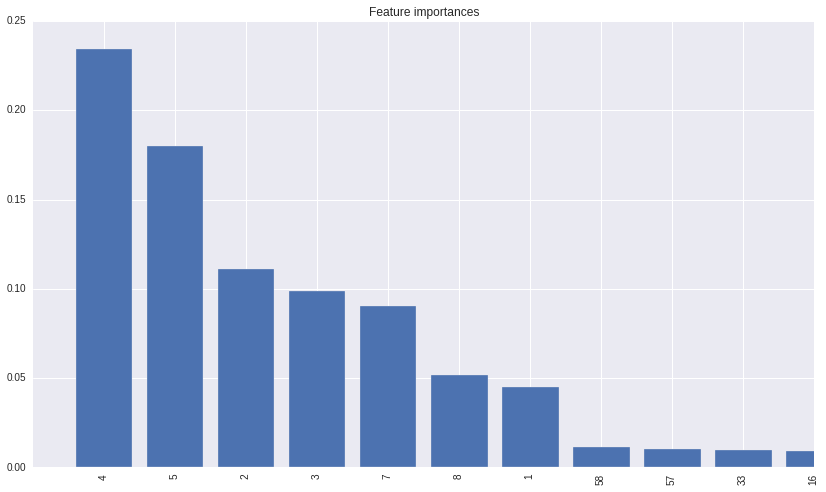

In [29]:
eval_estimator(RandomForestClassifier, X_train_H_let, y_train_H_let, X_test_H_let, y_test_H_let, 'HarvardX')

Target: MITx
Estimator: RandomForestClassifier        

Confusion Matrix:
[[24143    65    47    19    27]
 [   88   328   140    43    23]
 [  110   163   172    62    27]
 [  109    93   125    49    29]
 [  152    62    51    20    36]]

Classification_Report:
             precision    recall  f1-score   support

          F       0.98      0.99      0.99     24301
          A       0.46      0.53      0.49       622
          B       0.32      0.32      0.32       534
          C       0.25      0.12      0.16       405
          D       0.25      0.11      0.16       321

avg / total       0.94      0.94      0.94     26183


Accuracy Score: 0.9444 - fraction of correctly classified samples
                24728  - number of correctly classified samples
 Zero One Loss: 0.0556 - return the fraction of misclassifications
                1455   - number of misclassifications

Number of most important features:  10
Feature ranking:
1. (0.223686) %max_nchapters_complete
2. (0.151340) n

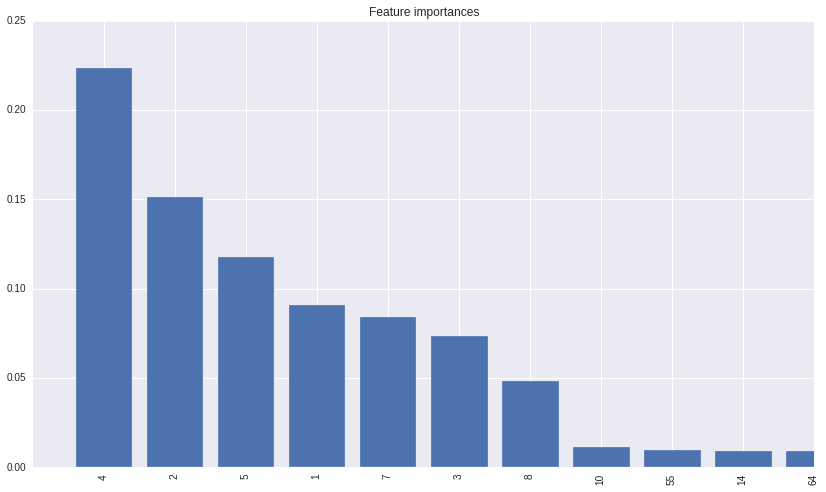

In [109]:
eval_estimator(RandomForestClassifier, X_train_M_let, y_train_M_let, X_test_M_let, y_test_M_let, 'MITx')

In [14]:
# X-VAL PREDICT?????????????????????????????
names, accs = [],[]
def binaryClass_eval(X_train, y_train, X_test, y_test):
    global names, accs
    names, accs = [],[]
    y_true = np.array(y_test)
    for algorithm in (LogisticRegression, #
                     KNeighborsClassifier,
                     GaussianNB,
                     DecisionTreeClassifier,
                     RandomForestClassifier):

        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        accuracy = np.mean(cross_val_score(
                algorithm().fit(X_train, y_train), X_test, y_test, cv=10, scoring='accuracy'))
        precision = np.mean(cross_val_score(
                algorithm().fit(X_train, y_train), X_test, y_test, cv=10, scoring='precision'))
        recall = np.mean(cross_val_score(algorithm(), X_test, y_test, cv=10, scoring='recall'))
        f1 = np.mean(cross_val_score(algorithm(), X_test, y_test, cv=10, scoring='f1_weighted'))
    
        if algorithm is SVC:
            model = []
            model = SVC(probability=True).fit(X_train, y_train)
            y_score = model.predict_proba(X_test)
            fpr, tpr, thresholds = roc_curve(y_true, y_score[:,1])
            roc_auc = auc(fpr, tpr)
        elif algorithm is DecisionTreeClassifier:
            model = []
            model = DecisionTreeClassifier().fit(X_train, y_train)
            y_score = model.predict_proba(X_test)
            fpr, tpr, thresholds = roc_curve(y_true, y_score[:,1])
            roc_auc = auc(fpr, tpr)
        else:
            model = []
            model = algorithm().fit(X_train, y_train)
            y_score = model.predict_proba(X_test)
            fpr, tpr, thresholds = roc_curve(y_true, y_score[:,1])
            roc_auc = auc(fpr, tpr)

        names.append(algorithm.__name__)
        accs.append(accuracy)
        print '%-30s' % (algorithm.__name__)
        print '%s %.4f' % ("Accuracy:", accuracy)
        print '%s %.4f' % ("Precision:", precision)
        print '%s %.4f' % ("Recall:", recall)
        print '%s %.4f' % ("f1:", f1)
        print '%s %.4f' % ("AUC:", roc_auc)
        print ''

        # Plot of a ROC curve for a specific class
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

LogisticRegression            
Accuracy: 0.9495
Precision: 0.7419
Recall: 0.7031
f1: 0.9489
AUC: 0.9790



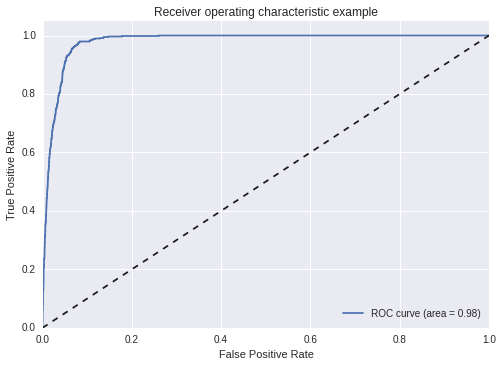

KNeighborsClassifier          
Accuracy: 0.9327
Precision: 0.6471
Recall: 0.6177
f1: 0.9320
AUC: 0.9332



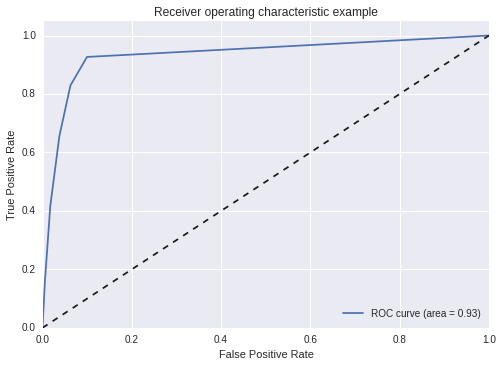

GaussianNB                    
Accuracy: 0.3696
Precision: 0.1319
Recall: 0.9727
f1: 0.4267
AUC: 0.9342



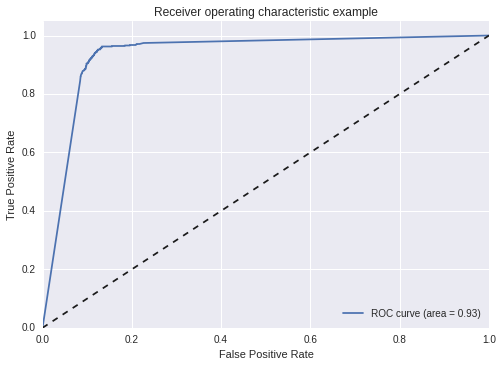

DecisionTreeClassifier        
Accuracy: 0.9443
Precision: 0.6923
Recall: 0.6928
f1: 0.9433
AUC: 0.8129



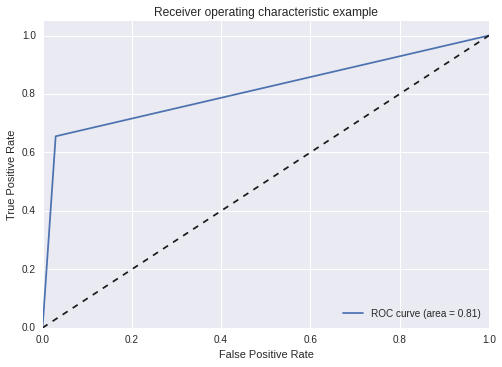

RandomForestClassifier        
Accuracy: 0.9487
Precision: 0.7530
Recall: 0.6708
f1: 0.9484
AUC: 0.9749



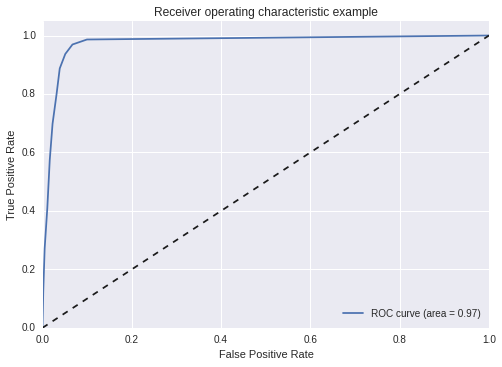

In [111]:
binaryClass_eval(X_train_H_cert, y_train_H_cert, X_test_H_cert, y_test_H_cert)

LogisticRegression            
Accuracy: 0.9800
Precision: 0.8630
Recall: 0.8771
f1: 0.9801
AUC: 0.9946



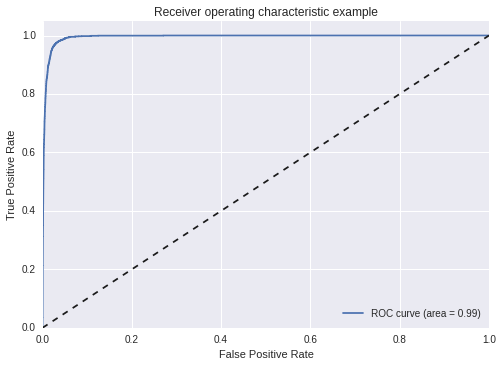

KNeighborsClassifier          
Accuracy: 0.9613
Precision: 0.7306
Recall: 0.7844
f1: 0.9620
AUC: 0.9645



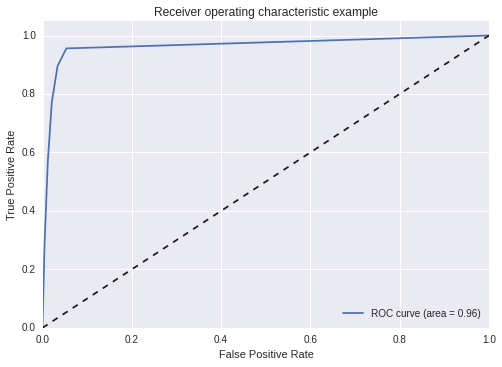

GaussianNB                    
Accuracy: 0.9484
Precision: 0.6008
Recall: 0.9694
f1: 0.9539
AUC: 0.9635



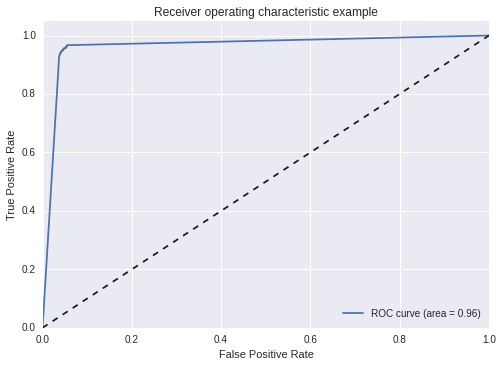

DecisionTreeClassifier        
Accuracy: 0.9753
Precision: 0.8278
Recall: 0.8435
f1: 0.9751
AUC: 0.9124



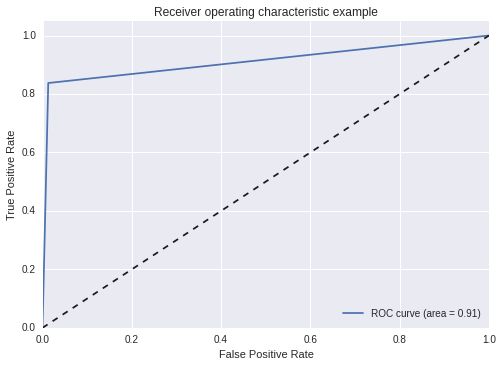

RandomForestClassifier        
Accuracy: 0.9802
Precision: 0.8765
Recall: 0.8646
f1: 0.9796
AUC: 0.9908



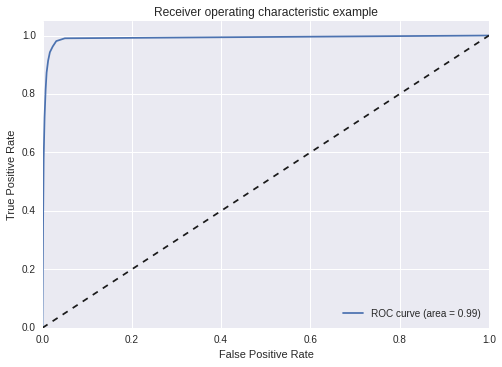

In [32]:
binaryClass_eval(X_train_M_cert, y_train_M_cert, X_test_M_cert, y_test_M_cert)

Target: HarvardX - PH207x
Estimator: RandomForestClassifier        

Confusion Matrix:
[[14813    13]
 [   28  1671]]

Classification_Report:
             precision    recall  f1-score   support

          F       1.00      1.00      1.00     14826
          A       0.99      0.98      0.99      1699

avg / total       1.00      1.00      1.00     16525


Accuracy Score: 0.9975 - fraction of correctly classified samples
                16484  - number of correctly classified samples
 Zero One Loss: 0.0025 - return the fraction of misclassifications
                41   - number of misclassifications

Number of most important features:  10
Feature ranking:
1. # 5 (0.211271) nevents
2. # 2 (0.184222) ndays_act
3. # 1 (0.168668) explored
4. # 4 (0.138975) nchapters
5. # 3 (0.091811) nplay_video
6. # 7 (0.050012) YoB
7. # 49 (0.016046) course_name_14.73x
8. # 50 (0.014504) course_name_2.01x
9. # 23 (0.007907) final_cc_cname_DI_India
10. # 48 (0.007388) gender_m


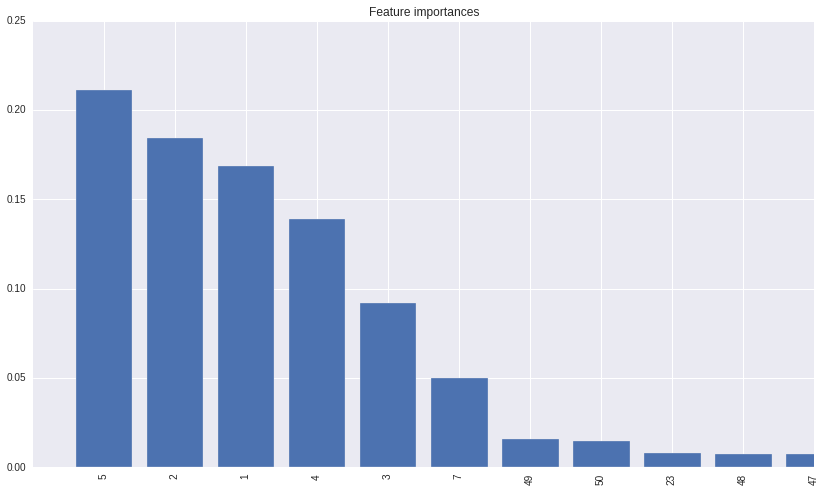

In [108]:
eval_estimator(RandomForestClassifier, X_HarvardX_cert, y_HarvardX_cert, X_HarvardX_PH207x, y_HarvardX_PH207x, 'HarvardX - PH207x')

In [116]:
X_HarvardX_cert['course_code_PH278x'].unique()

array([ 0.,  1.])

In [15]:
def forestReport(estimator, X_test, y_test,):
    rfclf = estimator(random_state = 777)
    model = rfclf.fit(X_train, y_train)
    
    y_score = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    y_true = np.array(np.float64(y_test))
    folds = 10 # better metrics with more folds
    target_names = ['Poisonoius', 'Edible']
    #sklearn.metrics
    #accuracy = accuracy_score(y_true, y_pred)
    #average_precision = average_precision_score(y_test, y_score[:, 1])

    # X_test, y_test - supervized learning

    #X-Val Scores????
    accuracy = np.mean(cross_val_score(rfclf, X_test, y_test, cv=folds, scoring='accuracy'))
    precision = np.mean(cross_val_score(rfclf, X_test, y_test, cv=folds, scoring='precision'))
    recall = np.mean(cross_val_score(rfclf, X_test, y_test, cv=folds, scoring='recall'))
    average_precision = np.mean(cross_val_score(rfclf, X_test, y_test, cv=folds, scoring='average_precision'))
    f1 = np.mean(cross_val_score(rfclf, X_test, y_test, cv=folds, scoring='f1'))
    neg_log_LR = np.mean(cross_val_score(rfclf, X_test, y_test, cv=folds, scoring='log_loss'))

    # sklearn.metrics
    ham_loss = hamming_loss(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    jaccard = jaccard_similarity_score(y_true, y_pred)
    brier = brier_score_loss(y_true, y_score[:,1])
    zeroOneLoss = zero_one_loss(y_true, y_pred)
    prfbs = precision_recall_fscore_support(y_true, y_pred)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    precision_PRC, recall_PRC, thresholds_PRC = precision_recall_curve(y_test, y_score[:,1])

    print 'Random Forest Classifier'
    print ''
    print '%s %.4f' % ("X-Val_Score -        Accuracy:", accuracy)
    print ''
    print '%s %.4f' % ("X-Val_score -  Mean Precision:", precision)
    # print '%s %.4f' % ("X-Val_score -    Mean Recall:", recall)
    # print '%s %.4f' % ("roc_curve - Mean Threshold:", np.mean(thresholds))
    print ''
    print '%s %.4f' % ("PRC -           Mean Precision:", np.mean(precision_PRC))
    # print '%s %.4f' % ("PRC -              Mean Recall:", np.mean(recall_PRC))
    # print '%s %.4f' % ("PRC -           Mean Threshold:", np.mean(thresholds_PRC))
    print ''
    print '%s %.4f' % ("                            F1:", f1)
    print '%s %.4f' % ("  Zero-one classification loss:", zeroOneLoss)
    print '%s %.4f' % ("                           MCC:", mcc)
    print '%s %.4f' % ('                  Hamming Loss:', ham_loss)
    print '%s %.4f' % ('            Jaccard Similarity:', jaccard)
    print '%s %.4f' % ('               Negative Log-LR:', neg_log_LR)
    print '%s %.4f' % ("                         Brier:", brier)
    print ''

    # Avg. Precision IS Precision-Recall AUC
    print 'AUCs:'
    print '%s %.4f' % ('             ROC -', roc_auc)
    print '%s %.4f' % ('Precision-Recall -', average_precision)
    print '*Note: average_precision = Precision-Recall AUC'
    print ''
    #RESEARCH: Weight for E/P for imputs, y_score[:,1]

    print '%s %.0f' % ('Poisonoius in Actual:', len(y_test.loc[y_test == 0]))
    print '%s %.0f' % ('Edible in Actual:', len(y_test.loc[y_test == 1]))
    print '%s %.0f' % ('All in Actual:', len(y_test))
    print ''

    print "Classification Report:"
    print classification_report(y_test, y_pred, target_names=target_names)

    print '%s %.0f' % ('Poisonoius in Actual:', len(y_test.loc[y_test == 0]))
    print '%s %.0f' % ('Edible in Actual:', len(y_test.loc[y_test == 1]))
    print '%s %.0f' % ('All in Actual:', len(y_test))
    print ''

    def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    cm = confusion_matrix(y_true, y_pred)
    print "Confusion Matrix: "
    print cm

    # Plot CM
    plt.figure()
    plot_confusion_matrix(cm)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print ''
    # Plot Precision-Recall curve
    plt.clf()
    plt.plot(recall_PRC, precision_PRC, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
    plt.legend(loc="lower left")
    plt.show()

In [ ]:
# # New Features
# %time
# mooc['letter_grade'] = mooc.apply(lambda row: letter_grade(row),axis=1)
# mooc['outcome'] = (mooc['certified'].replace(1, 'Certified:').replace(0, 'Not Certified:') 
#                    + ' ' + mooc['letter_grade']).map({'Not Certified: F':0,'Not Certified: D':1,
#                                                       'Not Certified: C':2,'Certified: F':3,'Certified: D':4,
#                                                       'Certified: C':5,'Certified: B':6,'Certified: A':7})

# # ['Not Certified: F' 'Certified: A' 'Certified: B' 'Not Certified: C'
# #  'Not Certified: D' 'Certified: C' 'Certified: D' 'Certified: F']

# # Generates chapter events
# mooc['nchapter_events'] = (mooc['nchapters'] * mooc['nevents'].divide(mooc['nchapters'])).fillna(0)

# mooc['institution'] = mooc['course_id'].str.split("/",return_type='frame',)[0]
# mooc['course_code'] = mooc['course_id'].str.split("/",return_type='frame',)[1]
# mooc['semester'] = mooc['course_id'].str.split("/",return_type='frame',)[2]

# # start year needs to be generated from 'semester', not dates!!!!
# mooc['start_year'] = mooc['semester'].str.split("_",return_type='frame',)[0].astype('int') #pd.DatetimeIndex(pd.to_datetime(mooc['start_time_DI'])).year
# mooc['age'] = mooc['start_year'] - mooc['YoB']
# # eliminate youngers!!!
# mooc['age_range'] = mooc.apply(lambda row: age_range(row),axis=1)
# mooc = mooc[mooc.age_range != ' ']

# # Completion/Comparison Metrics
# # Completion/Comparison
# max_chaps_completed = mooc[['course_code', 'nchapters']].groupby(['course_code']).max()
# mooc['max_nchapters'] = mooc.apply(lambda row: get_course_value(row, max_chaps_completed),axis=1)
# mooc['%max_chapters_viewed'] = mooc['nchapters'].divide(mooc['max_nchapters']) #(td / np.timedelta64(1, 'D')).astype(int)
# # Completion/Comparison
# max_video_views = mooc[['course_code', 'nplay_video']].groupby(['course_code']).max()
# mooc['max_nplay_video'] = mooc.apply(lambda row: get_course_value(row, max_video_views),axis=1)
# mooc['%max_videos_viewed'] = mooc['nplay_video'].divide(mooc['max_nplay_video'])
# # Comparison
# max_posts = mooc[['course_code', 'nforum_posts']].groupby(['course_code']).max()
# mooc['max_nforum_posts'] = mooc.apply(lambda row: get_course_value(row, max_posts),axis=1)
# mooc['%max_posts_viewed'] = mooc['nforum_posts'].divide(mooc['max_nforum_posts'])
# # Comparison
# max_events = mooc[['course_code', 'nevents']].groupby(['course_code']).max()
# mooc['max_nevents'] = mooc.apply(lambda row: get_course_value(row, max_events),axis=1)
# mooc['%max_events'] = mooc['nevents'].divide(mooc['max_nevents'])
# # Comparison
# max_days_act = mooc[['course_code', 'ndays_act']].groupby(['course_code']).max()
# mooc['max_ndays_act'] = mooc.apply(lambda row: get_course_value(row, max_days_act),axis=1)
# mooc['%max_days_act'] = mooc['ndays_act'].divide(mooc['max_ndays_act'])

# # 'ndays_act', 'nplay_video', 'nchapters', 'nevents', 'nforum_posts',

# # Interaction Ratios: <= 1% Interactions/events
# # (u'ndays_act', u'nplay_video', u'nchapters', u'nforum_posts') / u'nevents' 
# mooc['nplay_video/nevents'] = (mooc['nplay_video'].divide(mooc['nevents'])).fillna(0)
# mooc['ndays_chapter_events/nevents'] = (mooc['nchapters'].divide(mooc['nevents'])).fillna(0)
# mooc['nforum_posts/nevents'] = (mooc['nforum_posts'].divide(mooc['nevents'])).fillna(0)

# # u'ndays_act', u'nplay_video', u'nchapters', u'nevents', u'nforum_posts'
# # Events Per Day: <= 1 day
# # Visualization: that thing
# mooc['nevents_per_day'] = (mooc['nevents'].divide(mooc['max_ndays_act'])).fillna(0)
# mooc['nplay_video_per_day'] = (mooc['nplay_video'].divide(mooc['max_ndays_act'])).fillna(0)
# mooc['nchapters_per_day'] = (mooc['nchapters'].divide(mooc['max_ndays_act'])).fillna(0)
# mooc['nforum_posts_per_day'] = (mooc['nforum_posts'].divide(mooc['max_ndays_act'])).fillna(0)

# # Days spent on specific events
# # mooc['ndays_events'] = (mooc['nevents'] * mooc['ndays_act'].divide(mooc['nevents'])).fillna(0)
# mooc['ndays_play_video'] = (mooc['nplay_video'] * mooc['ndays_act'].divide(mooc['nplay_video'])).fillna(0)
# mooc['ndays_chapter_events'] = (mooc['nchapter_events'] * mooc['ndays_act'].divide(mooc['nchapter_events'])).fillna(0)
# mooc['ndays_forum_posts'] = (mooc['nforum_posts'] * mooc['ndays_act'].divide(mooc['nforum_posts'])).fillna(0)

# # mooc['registration_duration'] = (mooc['last_event_DI'] - mooc['start_time_DI'])
# # mooc = mooc[mooc['registration_duration'].astype(int) >= 0]
# # mooc['registration_duration'] = mooc.apply(lambda row: register_duration_2_days(row),axis=1)
# # days inactive

In [ ]:
# rows = []
# for i in MITx_600x['outcome'].values:
#     row = []
#     for col in MITx_600x.columns[2:17]:
#         row.append(MITx_600x[outcome_cols[2:17]][col][MITx_600x['outcome']==i].mean())
#     rows.append(row)
# mean_MITx_600x = pd.DataFrame(rows, columns=MITx_600x.columns[1:17])
# mean_MITx_600x['outcome'] = [0,1,2,3,4,5,6,7]